# Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import percentile
import pandas as pd
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.patches as patches
import miceforest as mf
import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss, classification_report,f1_score,confusion_matrix
from sklearn import preprocessing
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import normalize, LabelEncoder, PolynomialFeatures, Normalizer, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, OneHotEncoder
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import shuffle
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif, f_regression, f_classif, SelectKBest, SelectPercentile, SelectFpr
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.manifold import TSNE
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import silhouette_samples
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score, adjusted_mutual_info_score
from time import time

pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 500)
%matplotlib inline
plt.rcParams["figure.dpi"] = 200


# Data

https://archive.ics.uci.edu/ml/datasets/online+news+popularity#

     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

### Loading 
- storing exact articles data in a separate table for possible feature references - for example check top 10 most p0pular articles. 
- dropping url column. Timedelta will be kept as it is part of the solution 

In [2]:
df_news = pd.read_csv('OnlineNewsPopularity.csv', encoding='ISO-8859-1', sep=',')
df_news_article_ref = df_news.iloc[:,[0,1]] #creating reference table for later 
df_news.drop(df_news.iloc[:,[0]], axis=1, inplace=True)
df_news.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

        num_keywords   data_channel_is_lifestyle  \
count   39644.000000                39644.000000   
mean        7.223767                    0.052946   
std         1.909130                    0.223929   
min         1.000000                    0.000000   
25%         6.000000                    0.000000   
50%         7.000000                    0.000000   
75%         9.000000                    0.000000   
max        10.000000                    1.000000   

        data_channel_is_entertainment   data_channel_is_bus  \
count                    39644.000000          39644.000000   
mean                         0.178009              0.157855   
std                          0.382525              0.364610   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          0.000000              0.000000   
75%                          0.000000              0.000000   
max                          1.000000              1.000000   

        data_channel_is_socmed   data_channel_is_tech   data_channel_is_world  \
count             39644.000000           39644.000000            39644.000000   
mean                  0.058597               0.185299                0.212567   
std                   0.234871               0.388545                0.409129   
min                   0.000000               0.000000                0.000000   
25%                   0.000000               0.000000                0.000000   
50%                   0.000000               0.000000                0.000000   
75%                   0.000000               0.000000                0.000000   
max                   1.000000               1.000000                1.000000   

         kw_min_min     kw_max_min    kw_avg_min     kw_min_max  \
count  39644.000000   39644.000000  39644.000000   39644.000000   
mean      26.106801    1153.951682    312.366967   13612.354102   
std       69.633215    3857.9908

## General Data Preparation 

#### 1. Reducing Dimensionality 

- I would like to bring the 7 columns representing each day of the week and when the article was published into one column. I think that make sense here as I tried the classification on the 7 columns and the those features came with very low score. Plus under one column we can do some good analytics - for example when most shares happen in the week. Are there different type of articles in the week. 


In [3]:
df_news[' weekday_is_monday'].mask(df_news[' weekday_is_monday'] == 1, 1, inplace=True)
df_news[' weekday_is_tuesday'].mask(df_news[' weekday_is_tuesday'] == 1, 2, inplace=True)
df_news[' weekday_is_wednesday'].mask(df_news[' weekday_is_wednesday'] == 1, 3, inplace=True)
df_news[' weekday_is_thursday'].mask(df_news[' weekday_is_thursday'] == 1, 4, inplace=True)
df_news[' weekday_is_friday'].mask(df_news[' weekday_is_friday'] == 1, 5, inplace=True)
df_news[' weekday_is_saturday'].mask(df_news[' weekday_is_saturday'] == 1, 6, inplace=True)
df_news[' weekday_is_sunday'].mask(df_news[' weekday_is_sunday'] == 1, 7, inplace=True)

df_news['day_is'] = (df_news[' weekday_is_monday'] + df_news[' weekday_is_tuesday'] + 
                     df_news[' weekday_is_wednesday'] + df_news[' weekday_is_thursday'] +
                     df_news[' weekday_is_friday'] + df_news[' weekday_is_saturday'] +
                     df_news[' weekday_is_sunday'])

df_news.drop([' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',
              ' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday'], axis=1, inplace=True)

df_news.groupby('day_is').count()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
day_is                                                                     
1.0           6661             6661               6661              6661   
2.0           7390             7390               7390              7390   
3.0           7435             7435               7435              7435   
4.0           7267             7267               7267              7267   
5.0           5701             5701               5701              5701   
6.0           2453             2453               2453              2453   
7.0           2737             2737               2737              2737   

         n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
day_is                                                             
1.0                  6661                       6661        6661   
2.0                  7390                       7390        7390   
3.0                  7435                       7435        7435   
4.0                  7267                       7267        7267   
5.0                  5701                       5701        5701   
6.0                  2453                       2453        2453   
7.0                  2737                       2737        2737   

         num_self_hrefs   num_imgs   num_videos   average_token_length  \
day_is                                                                   
1.0                6661       6661         6661                   6661   
2.0                7390       7390         7390                   7390   
3.0                7435       7435         7435                   7435   
4.0                7267       7267         7267                   7267   
5.0                5701       5701         5701                   5701   
6.0                2453       2453         2453                   2453   
7.0                2737       2737         2737                   2737   

         num_keywords   data_channel_is_lifestyle  \
day_is                                              
1.0              6661                        6661   
2.0              7390                        7390   
3.0              7435                        7435   
4.0              7267                        7267   
5.0              5701                        5701   
6.0              2453                        2453   
7.0              2737                        2737   

         data_channel_is_entertainment   data_channel_is_bus  \
day_is                                                         
1.0                               6661                  6661   
2.0                               7390                  7390   
3.0                               7435                  7435   
4.0                               7267                  7267   
5.0                               5701                  5701   
6.0                               2453                  2453   
7.0                               2737                  2737   

         data_channel_is_socmed   data_channel_is_tech  \
day_is                                                   
1.0                        6661                   6661   
2.0                        7390                   7390   
3.0                        7435                   7435   
4.0                        7267                   7267   
5.0                        5701                   5701   
6.0                        2453                   2453   
7.0                        2737                   2737   

         data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min  \
day_is                                                                  
1.0                       6661         6661         6661         6661   
2.0                       7390         7390         7390         7390   
3.0                       7435         7435         7435         7435   
4.0                       7267         7267         7267         7267   
5.0                       57

- Visualizing the new column Day_is 

3.410251236000404


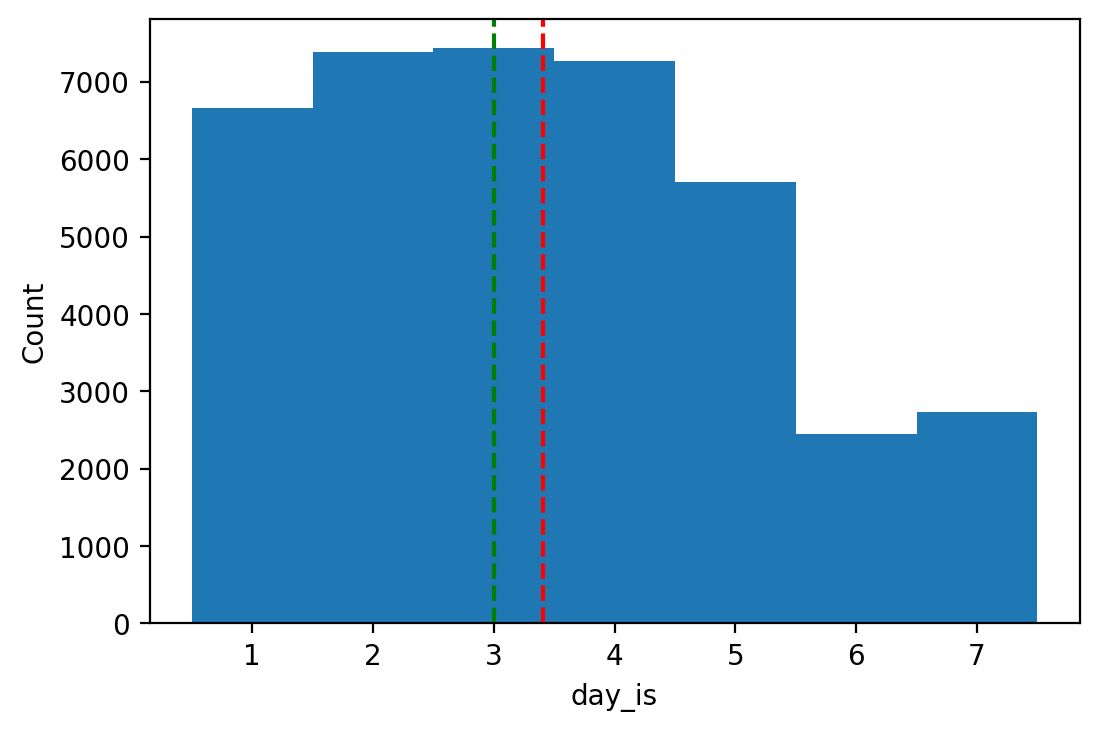

In [4]:
print(df_news['day_is'].mean())
freq = df_news['day_is'].value_counts().sort_index()
freq_frame = freq.to_frame()
mean = df_news['day_is'].mean()
median = df_news['day_is'].median()
plt.bar(freq_frame.index,freq_frame['day_is'],
        width=1,align='center')
plt.xlabel('day_is')
plt.ylabel('Count')
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')
plt.show()

- Reducing dimensionality of source columns - brought under one column and given numbers as identifier for each source type 

In [5]:
df_news[' data_channel_is_lifestyle'].mask(df_news[' data_channel_is_lifestyle'] == 1, 1, inplace=True)
df_news[' data_channel_is_entertainment'].mask(df_news[' data_channel_is_entertainment'] == 1, 2, inplace=True)
df_news[' data_channel_is_bus'].mask(df_news[' data_channel_is_bus'] == 1, 3, inplace=True)
df_news[' data_channel_is_socmed'].mask(df_news[' data_channel_is_socmed'] == 1, 4, inplace=True)
df_news[' data_channel_is_tech'].mask(df_news[' data_channel_is_tech'] == 1, 5, inplace=True)
df_news[' data_channel_is_world'].mask(df_news[' data_channel_is_world'] == 1, 6, inplace=True)

df_news['source_is'] = (df_news[' data_channel_is_lifestyle'] + df_news[' data_channel_is_entertainment'] + 
                     df_news[' data_channel_is_bus']+ df_news[' data_channel_is_socmed'] +
                     df_news[' data_channel_is_tech'] + df_news[' data_channel_is_world'])

df_news.drop([' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',
              ' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world'], axis=1, inplace=True)
df_news.groupby('source_is').count()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
source_is                                                                     
0.0              6134             6134               6134              6134   
1.0              2099             2099               2099              2099   
2.0              7057             7057               7057              7057   
3.0              6258             6258               6258              6258   
4.0              2323             2323               2323              2323   
5.0              7346             7346               7346              7346   
6.0              8427             8427               8427              8427   

            n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
source_is                                                             
0.0                     6134                       6134        6134   
1.0                     2099                       2099        2099   
2.0                     7057                       7057        7057   
3.0                     6258                       6258        6258   
4.0                     2323                       2323        2323   
5.0                     7346                       7346        7346   
6.0                     8427                       8427        8427   

            num_self_hrefs   num_imgs   num_videos   average_token_length  \
source_is                                                                   
0.0                   6134       6134         6134                   6134   
1.0                   2099       2099         2099                   2099   
2.0                   7057       7057         7057                   7057   
3.0                   6258       6258         6258                   6258   
4.0                   2323       2323         2323                   2323   
5.0                   7346       7346         7346                   7346   
6.0                   8427       8427         8427                   8427   

            num_keywords   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
source_is                                                                      
0.0                 6134         6134         6134         6134         6134   
1.0                 2099         2099         2099         2099         2099   
2.0                 7057         7057         7057         7057         7057   
3.0                 6258         6258         6258         6258         6258   
4.0                 2323         2323         2323         2323         2323   
5.0                 7346         7346         7346         7346         7346   
6.0                 8427         8427         8427         8427         8427   

            kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
source_is                                                                    
0.0               6134         6134         6134         6134         6134   
1.0               2099         2099         2099         2099         2099   
2.0               7057         7057         7057         7057         7057   
3.0               6258         6258         6258         6258         6258   
4.0               2323         2323         2323         2323         2323   
5.0               7346         7346         7346         7346         7346   
6.0               8427         8427         8427         8427         8427   

            self_reference_min_shares   self_reference_max_shares  \
source_is                                                           
0.0                              6134                        6134   
1.0                              2099                        2099   
2.0                              7057                        7057   
3.0                              6258                        6258   
4.0                              2323                        2323   
5.0                              7346                      

#### Removing column 
- n_non_stop_words column makes no sense, just 1s, a bit of 0s and one big outlier. to be be removed 
-  n_tokens_content with 0 as entry - either those articles with no content at all or some entry mistake. in any case since we don't have the source where this data comes from, we can't check, hence is removing the zeros 
- keeping one of the LDAs columns as I assume all this columns as are about Topics within the same article - assumption and since I don't know more I will keep just one (later when modeling I ran Multicoliniarity test and they indeed came all as 'Inf')

In [6]:
df_news.drop(' n_non_stop_words', axis=1, inplace=True) #its all 1s and outlier
df_news.drop([' LDA_01',' LDA_02',' LDA_03',' LDA_04'], axis=1, inplace=True) 

In [7]:
df_news.groupby(' n_tokens_content').count()
df_news  = df_news[df_news[' n_tokens_content'] != 0]
df_news[' n_tokens_content'].describe()

count    38463.000000
mean       563.295375
std        468.299538
min         18.000000
25%        259.000000
50%        423.000000
75%        729.000000
max       8474.000000
Name:  n_tokens_content, dtype: float64

Overall this data set looks ok from data cleaning perspective. No missing values and any other strange occurencies. 

# Question 1: Classifying which articles will be popular by defining an appropriate popularity threshold. 

### News articles freshness 
- here we check data in bins per 120 days (4 months) 
- then we select the first 120 days of data 
- the idea that every 7 days from the moment we start, we will drop last week and add the latest week with publications 
- from here onwards, one set of data (4 months) will be used for modeling 

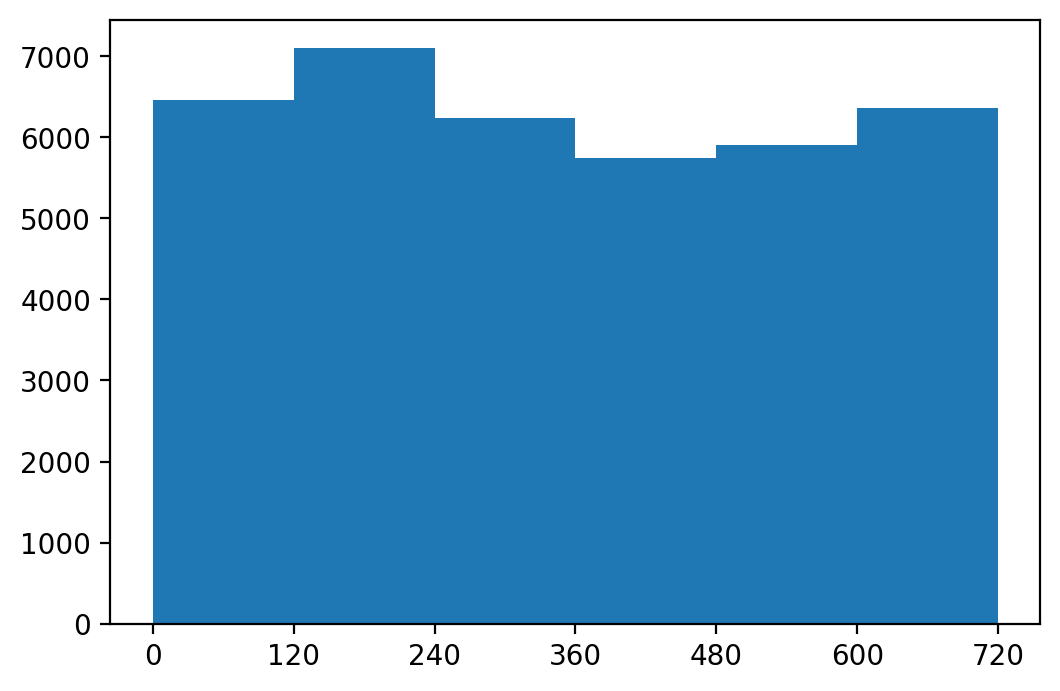

In [8]:
plt.hist(df_news[' timedelta'],bins=[0, 120, 240, 360, 480, 600, 720])
plt.xticks([0, 120, 240, 360, 480, 600, 720])
plt.show()

In [9]:
df_news_small = df_news[df_news[' timedelta'] <121]
df_news_small.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  6540.000000      6540.000000        6540.000000       6540.000000   
mean     66.171407        11.125229         608.510092          0.530672   
std      31.233824         2.186811         444.417884          0.091665   
min       8.000000         3.000000          24.000000          0.155440   
25%      38.750000        10.000000         302.000000          0.469711   
50%      66.000000        11.000000         479.000000          0.527883   
75%      92.000000        13.000000         799.000000          0.588679   
max     120.000000        23.000000        6159.000000          1.000000   

        n_non_stop_unique_tokens    num_hrefs   num_self_hrefs     num_imgs  \
count                6540.000000  6540.000000      6540.000000  6540.000000   
mean                    0.684054    11.012844         2.965291     3.869725   
std                     0.090955    11.819958         3.490601     6.661122   
min                     0.146341     0.000000         0.000000     0.000000   
25%                     0.629743     4.000000         1.000000     1.000000   
50%                     0.683440     8.000000         2.000000     1.000000   
75%                     0.739547    14.000000         4.000000     3.000000   
max                     1.000000   304.000000       116.000000    79.000000   

        num_videos   average_token_length   num_keywords   kw_min_min  \
count  6540.000000            6540.000000    6540.000000       6540.0   
mean      1.208410               4.701700       6.903517         -1.0   
std       3.853665               0.289085       1.892836          0.0   
min       0.000000               3.762238       1.000000         -1.0   
25%       0.000000               4.507011       6.000000         -1.0   
50%       0.000000               4.698359       7.000000         -1.0   
75%       1.000000               4.886812       8.000000         -1.0   
max      50.000000               8.041534      10.000000         -1.0   

         kw_max_min   kw_avg_min     kw_min_max     kw_max_max     kw_avg_max  \
count   6540.000000  6540.000000    6540.000000    6540.000000    6540.000000   
mean     896.126419   207.772924   16465.780428  843217.568807  309059.670246   
std     2101.868894   348.792536   53943.526872    3848.162509  103402.863744   
min        0.000000    -1.000000       0.000000  663600.000000   91000.000000   
25%      410.000000    88.500000       0.000000  843300.000000  233674.285714   
50%      620.500000   161.788889    2300.000000  843300.000000  292960.000000   
75%      892.000000   249.833333   11825.000000  843300.000000  368866.071429   
max    57200.000000  8549.333333  843300.000000  843300.000000  843300.000000   

        kw_min_avg     kw_max_avg    kw_avg_avg   self_reference_min_shares  \
count  6540.000000    6540.000000   6540.000000                 6540.000000   
mean   1248.681543    5350.860551   3104.993033                 3630.460578   
std    1108.564032    4789.211449   1185.854044                14591.531117   
min      -1.000000    3384.316871   1009.340669                    0.000000   
25%       0.000000    3460.169194   2392.610736                  806.750000   
50%    1245.697475    4143.322829   2856.673423                 1200.000000   
75%    2144.473236    5830.870978   3500.573296                 2500.000000   
max    3484.919628  116503.500000  32523.997357               663600.000000   

        self_reference_max_shares   self_reference_avg_sharess   is_weekend  \
count                 6540.000000                  6540.000000  6540.000000   
mean                  8368.526758                  5299.790151     0.132416   
std                  29924.124171                 16557.832652     0.338968   
min                      0.000000                     0.000000     0.000000   
25%                   1200.000000                  1100.000000     0.000000   
50%                   2700.000000     

### Dealing with outliers 

- we could decide to send all articles marked as outliers > 3 std for manual review for example
- below one can see that will make about ~700 articles per 4 months 
- that is 180 per month to check 

In [10]:
df_news_small[" shares"].describe()

count      6540.000000
mean       2744.478593
std        6748.356920
min           5.000000
25%         897.750000
50%        1300.000000
75%        2300.000000
max      284700.000000
Name:  shares, dtype: float64

IQR is: 1402.25
IQR Range + : 4403.375
IQR Range - : -1205.625
99th quantile: 27343.99999999987
Skweness: 16.621364759171804


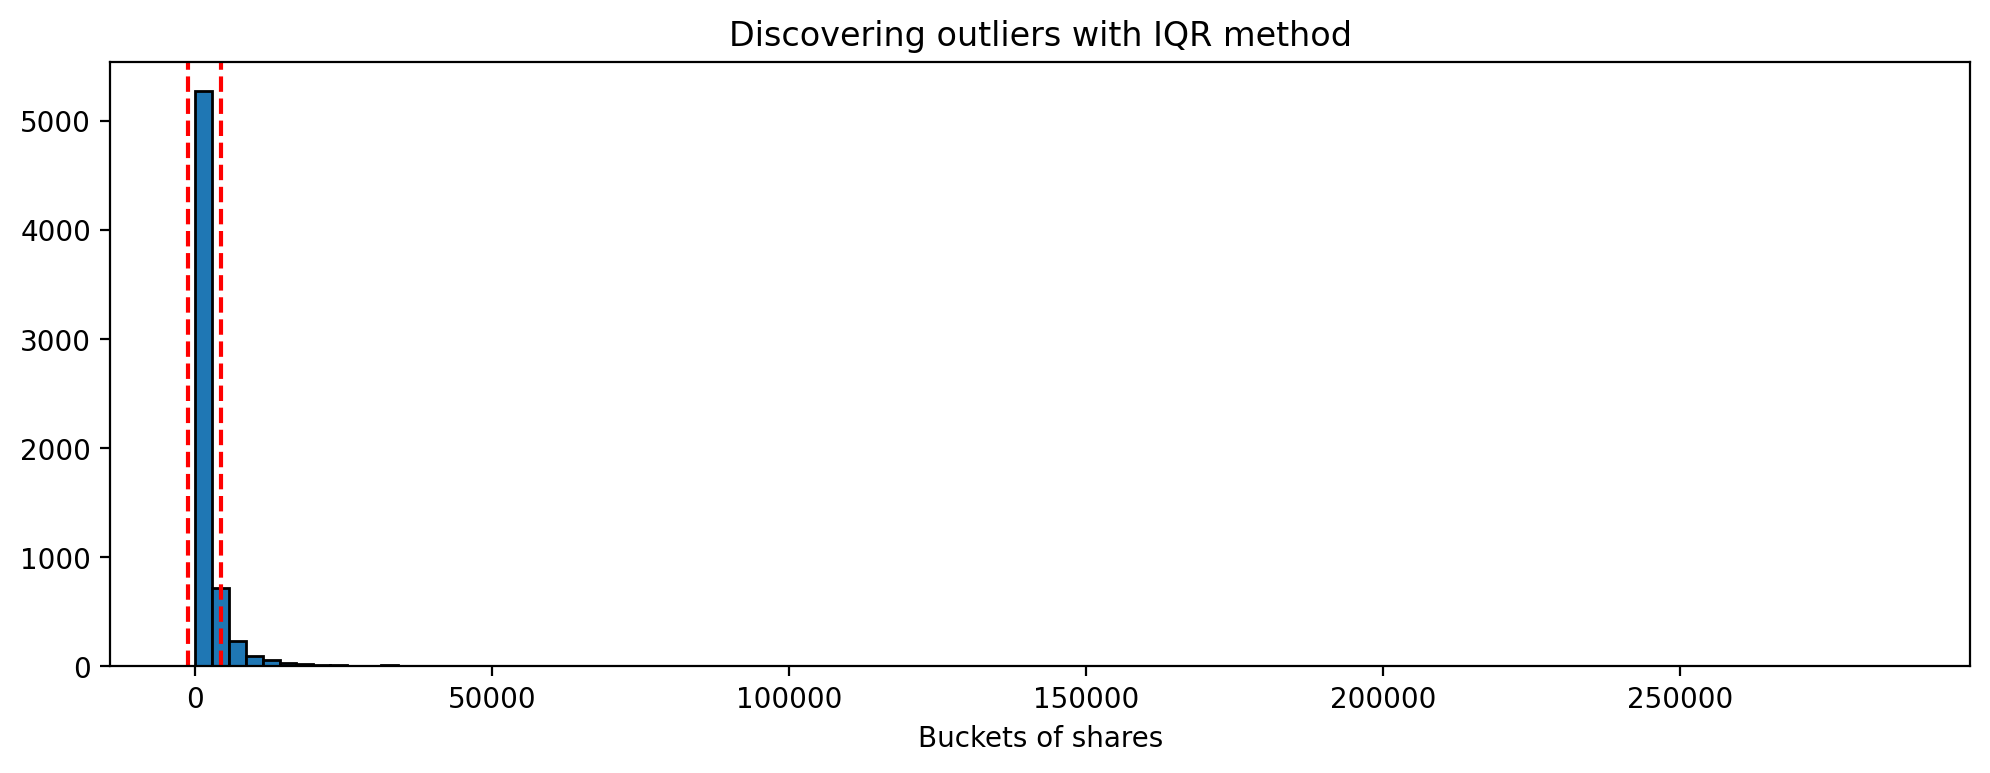

In [11]:
#the IQR method.
m=df_news_small[' shares']
iqr = stats.iqr(m) 
print('IQR is:', iqr)
print('IQR Range + :', np.percentile(m, 75)+1.5*iqr)
print('IQR Range - :', np.percentile(m, 25)-1.5*iqr)
print('99th quantile:',m.quantile(0.99))
print('Skweness:',m.skew())

plt.figure(figsize=(12,4))
plt.hist(m,bins=100, edgecolor="black")
plt.title('Discovering outliers with IQR method')
plt.xlabel("Buckets of shares")

# Vertical lines for each percentile of interest
plt.axvline(np.percentile(m, 75)+1.5*iqr, linestyle='--', color='red')
plt.axvline(np.percentile(m, 25)-1.5*iqr, linestyle='--', color='red')
plt.show()

In [12]:
i = df_news_small[' shares']
iqr = stats.iqr(i) 
lower, upper = (np.percentile(i, 25)-1.5*iqr), (np.percentile(i,75)+1.5*iqr)
df_news_small['shares_out'] = df_news_small[' shares'].apply(lambda x : 1 if x < lower or x > upper else 0)
df_news_small.groupby('shares_out').count()

<ipython-input-12-c787a12f4717>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_small['shares_out'] = df_news_small[' shares'].apply(lambda x : 1 if x < lower or x > upper else 0)


timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
shares_out                                                                     
0                 5811             5811               5811              5811   
1                  729              729                729               729   

             n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
shares_out                                                                      
0                                5811        5811             5811       5811   
1                                 729         729              729        729   

             num_videos   average_token_length   num_keywords   kw_min_min  \
shares_out                                                                   
0                  5811                   5811           5811         5811   
1                   729                    729            729          729   

             kw_max_min   kw_avg_min   kw_min_max   kw_max_max   kw_avg_max  \
shares_out                                                                    
0                  5811         5811         5811         5811         5811   
1                   729          729          729          729          729   

             kw_min_avg   kw_max_avg   kw_avg_avg   self_reference_min_shares  \
shares_out                                                                      
0                  5811         5811         5811                        5811   
1                   729          729          729                         729   

             self_reference_max_shares   self_reference_avg_sharess  \
shares_out                                                            
0                                 5811                         5811   
1                                  729                          729   

             is_weekend   LDA_00   global_subjectivity  \
shares_out                                               
0                  5811     5811                  5811   
1                   729      729                   729   

             global_sentiment_polarity   global_rate_positive_words  \
shares_out                                                            
0                                 5811                         5811   
1                                  729                          729   

             global_rate_negative_words   rate_positive_words  \
shares_out                                                      
0                                  5811                  5811   
1                                   729                   729   

             rate_negative_words   avg_positive_polarity  \
shares_out                                                 
0                           5811                    5811   
1                            729                     729   

             min_positive_polarity   max_positive_polarity  \
shares_out                                                   
0                             5811                    5811   
1                              729                     729   

             avg_negative_polarity   min_negative_polarity  \
shares_out                                                   
0                             5811                    5811   
1                              729                     729   

             max_negative_polarity   title_subjectivity  \
shares_out                                                
0                             5811                 5811   
1                              729                  729   

             title_sentiment_polarity   abs_title_subjectivity  \
shares_out                                                       
0                                5811                     5811   
1                                 729                      729   

             abs_title_sentiment_polarity   shares  day_is  source_is  
shares_out                         

In [13]:
df_news__small_trim = df_news_small[df_news_small['shares_out'] != 1]
df_news__small_trim[' shares'].describe()

count    5811.000000
mean     1459.798830
std       860.656039
min         5.000000
25%       864.000000
50%      1200.000000
75%      1800.000000
max      4400.000000
Name:  shares, dtype: float64

IQR is: 936.0
IQR Range + : 3204.0
IQR Range - : -540.0
99th quantile: 4200.0
Skweness: 1.3806848497005944


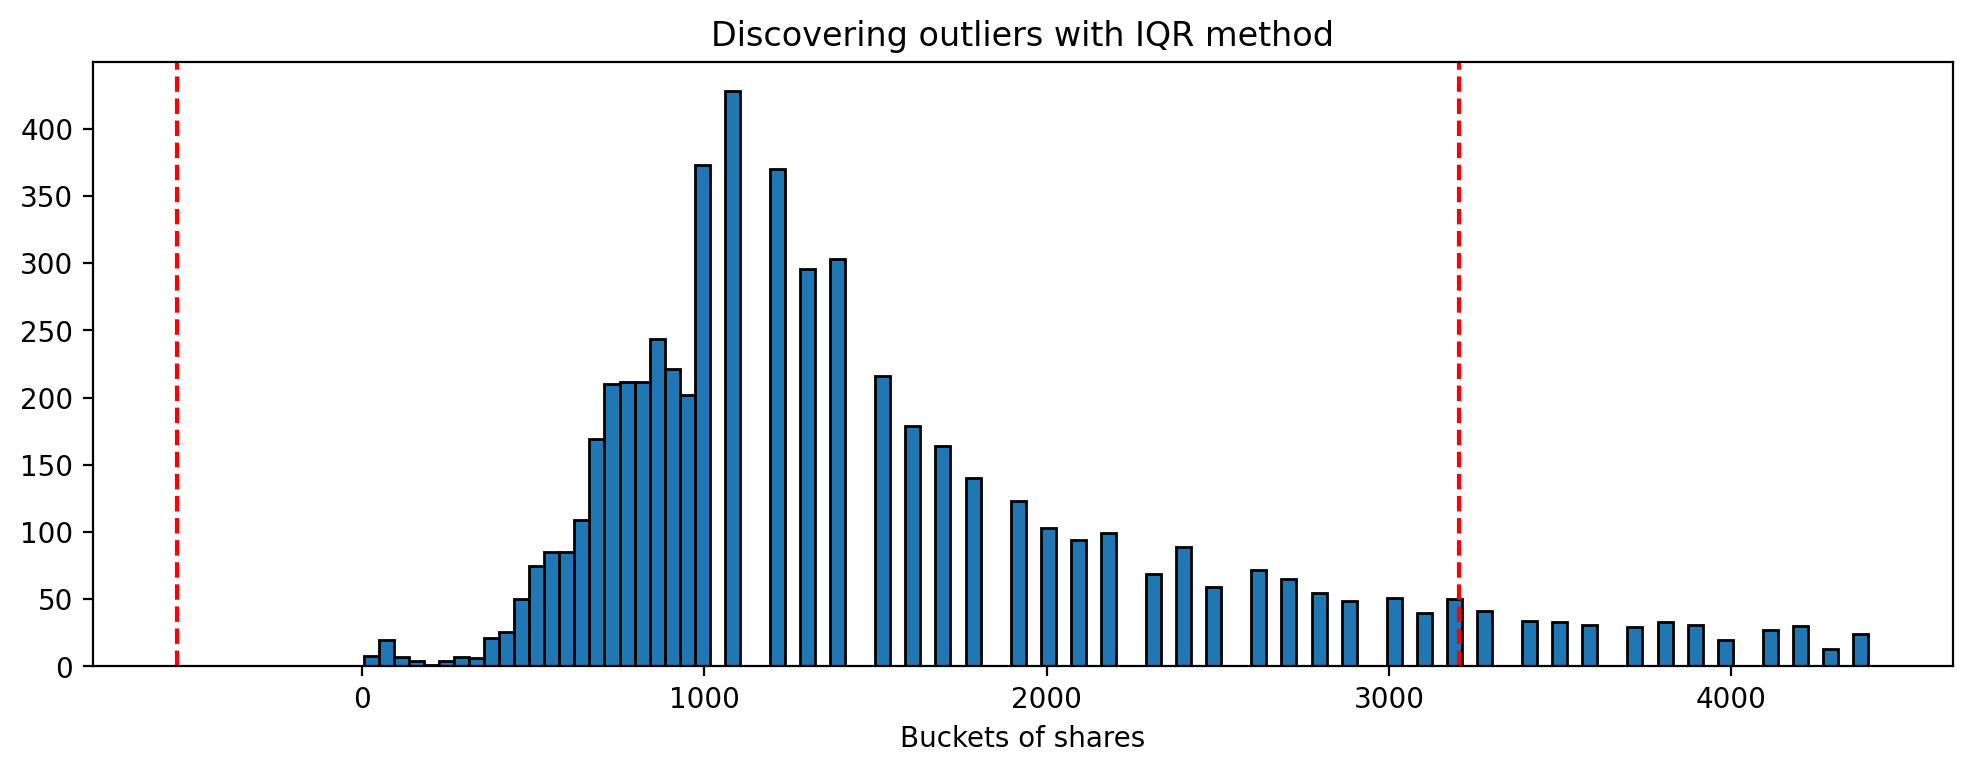

In [14]:
#the IQR method.
m=df_news__small_trim[' shares']
iqr = stats.iqr(m) 
print('IQR is:', iqr)
print('IQR Range + :', np.percentile(m, 75)+1.5*iqr)
print('IQR Range - :', np.percentile(m, 25)-1.5*iqr)
print('99th quantile:',m.quantile(0.99))
print('Skweness:', m.skew())

plt.figure(figsize=(12,4))
plt.hist(m,bins=100, edgecolor="black")
plt.title('Discovering outliers with IQR method')
plt.xlabel("Buckets of shares")

# Vertical lines for each percentile of interest
plt.axvline(np.percentile(m, 75)+1.5*iqr, linestyle='--', color='red')
plt.axvline(np.percentile(m, 25)-1.5*iqr, linestyle='--', color='red')
plt.show()

### Building Popularity index from the trimmed data sample (df_news_small_trim)
- we will use Shares counts 
- although I trimmed the data sample, I tried to keep some outliers and in general to stay closer to the original data set and to keep the logic we should expect many articles to have very little shares and a fee to have a lot of shares

In [15]:
df_news_4m = df_news__small_trim.copy()
df_news_4m[' shares'].describe()

count    5811.000000
mean     1459.798830
std       860.656039
min         5.000000
25%       864.000000
50%      1200.000000
75%      1800.000000
max      4400.000000
Name:  shares, dtype: float64

In [16]:
print('median:',df_news_4m[' shares'].median())
print('mean:',df_news_4m[' shares'].mean())
print('max:',df_news_4m[' shares'].max())
print('min:',df_news_4m[' shares'].min())

median: 1200.0
mean: 1459.7988298055411
max: 4400
min: 5


- Encoding the Shares for classification based on quantiles buckets 
- Labels are based on the buckets and the idea is they to be useful for the management team 

In [17]:
bin_labels = ['0_Fresh', '1_Rising_Star','2_Popular', '3_popularXL'] 
q = [0,.3, .60, .9 ,1] 

In [18]:
df_news_4m['shares_cat_label'], bins = pd.qcut(df_news_4m.iloc[:,41], q=q, labels=bin_labels, retbins=True)
print(bins)
df_news_4m.groupby(['shares_cat_label'])[' shares'].count()

[   5.  921. 1400. 2800. 4400.]


shares_cat_label
0_Fresh          1744
1_Rising_Star    2004
2_Popular        1527
3_popularXL       536
Name:  shares, dtype: int64

In [19]:
label_encoder = LabelEncoder()
df_news_4m['shares_encoded'] = label_encoder.fit_transform(df_news_4m['shares_cat_label'])
label_encoder.classes_

array(['0_Fresh', '1_Rising_Star', '2_Popular', '3_popularXL'],
      dtype=object)

### Visualising relationships in the data 
- there are two distinct groups based on the week pattern - week days vs weekends 

<AxesSubplot:xlabel='day_is', ylabel='count'>

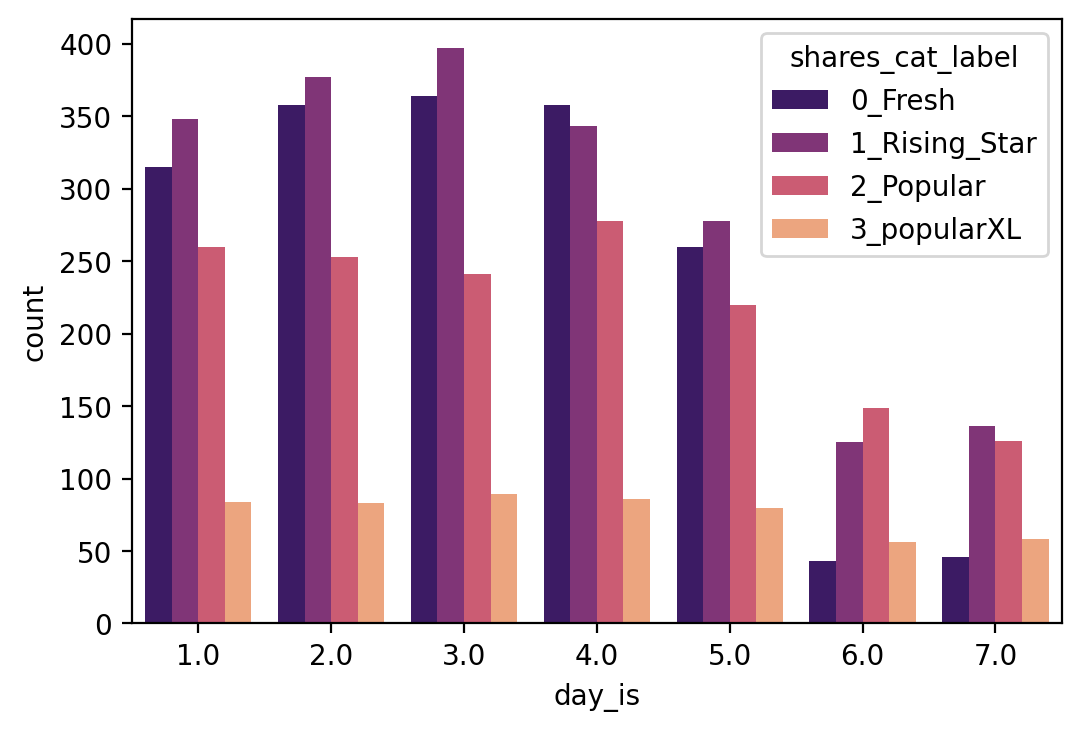

In [20]:
sns.countplot(x = 'day_is', hue ='shares_cat_label', data = df_news_4m,palette = 'magma')

- Business and Tech share interesting pattern where they have less fresh articles and higher presence of Popular articles. World is probably mix of all other sources. That could be a potential problem in clustering/classification 

Text(0.5, 0, "{0: 'Unknown', 1: 'Lifestyle', 2: 'Entertainment', 3: 'Business', 4: 'Social Media', 5: 'Tech', 6: 'World'}")

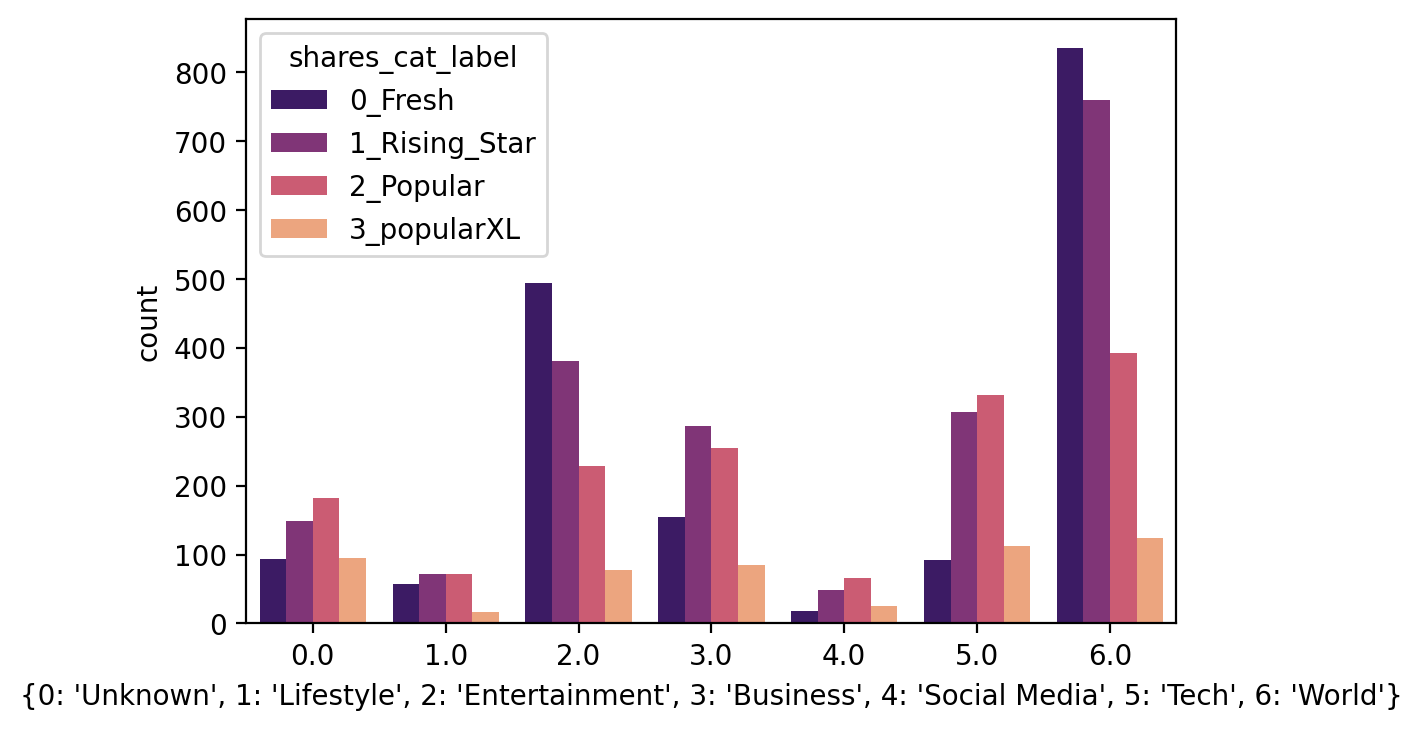

In [21]:
sns.countplot(x = 'source_is', hue ='shares_cat_label', data = df_news_4m,palette = 'magma')

labels = {0:'Unknown',1:'Lifestyle',2:'Entertainment',3:'Business',4:'Social Media',5:'Tech',6:'World'}
plt.xlabel(labels)

- most of the features as skewed aka high presence of outliers. Either do log now or use standartisation that deals with outliers like RobustScale

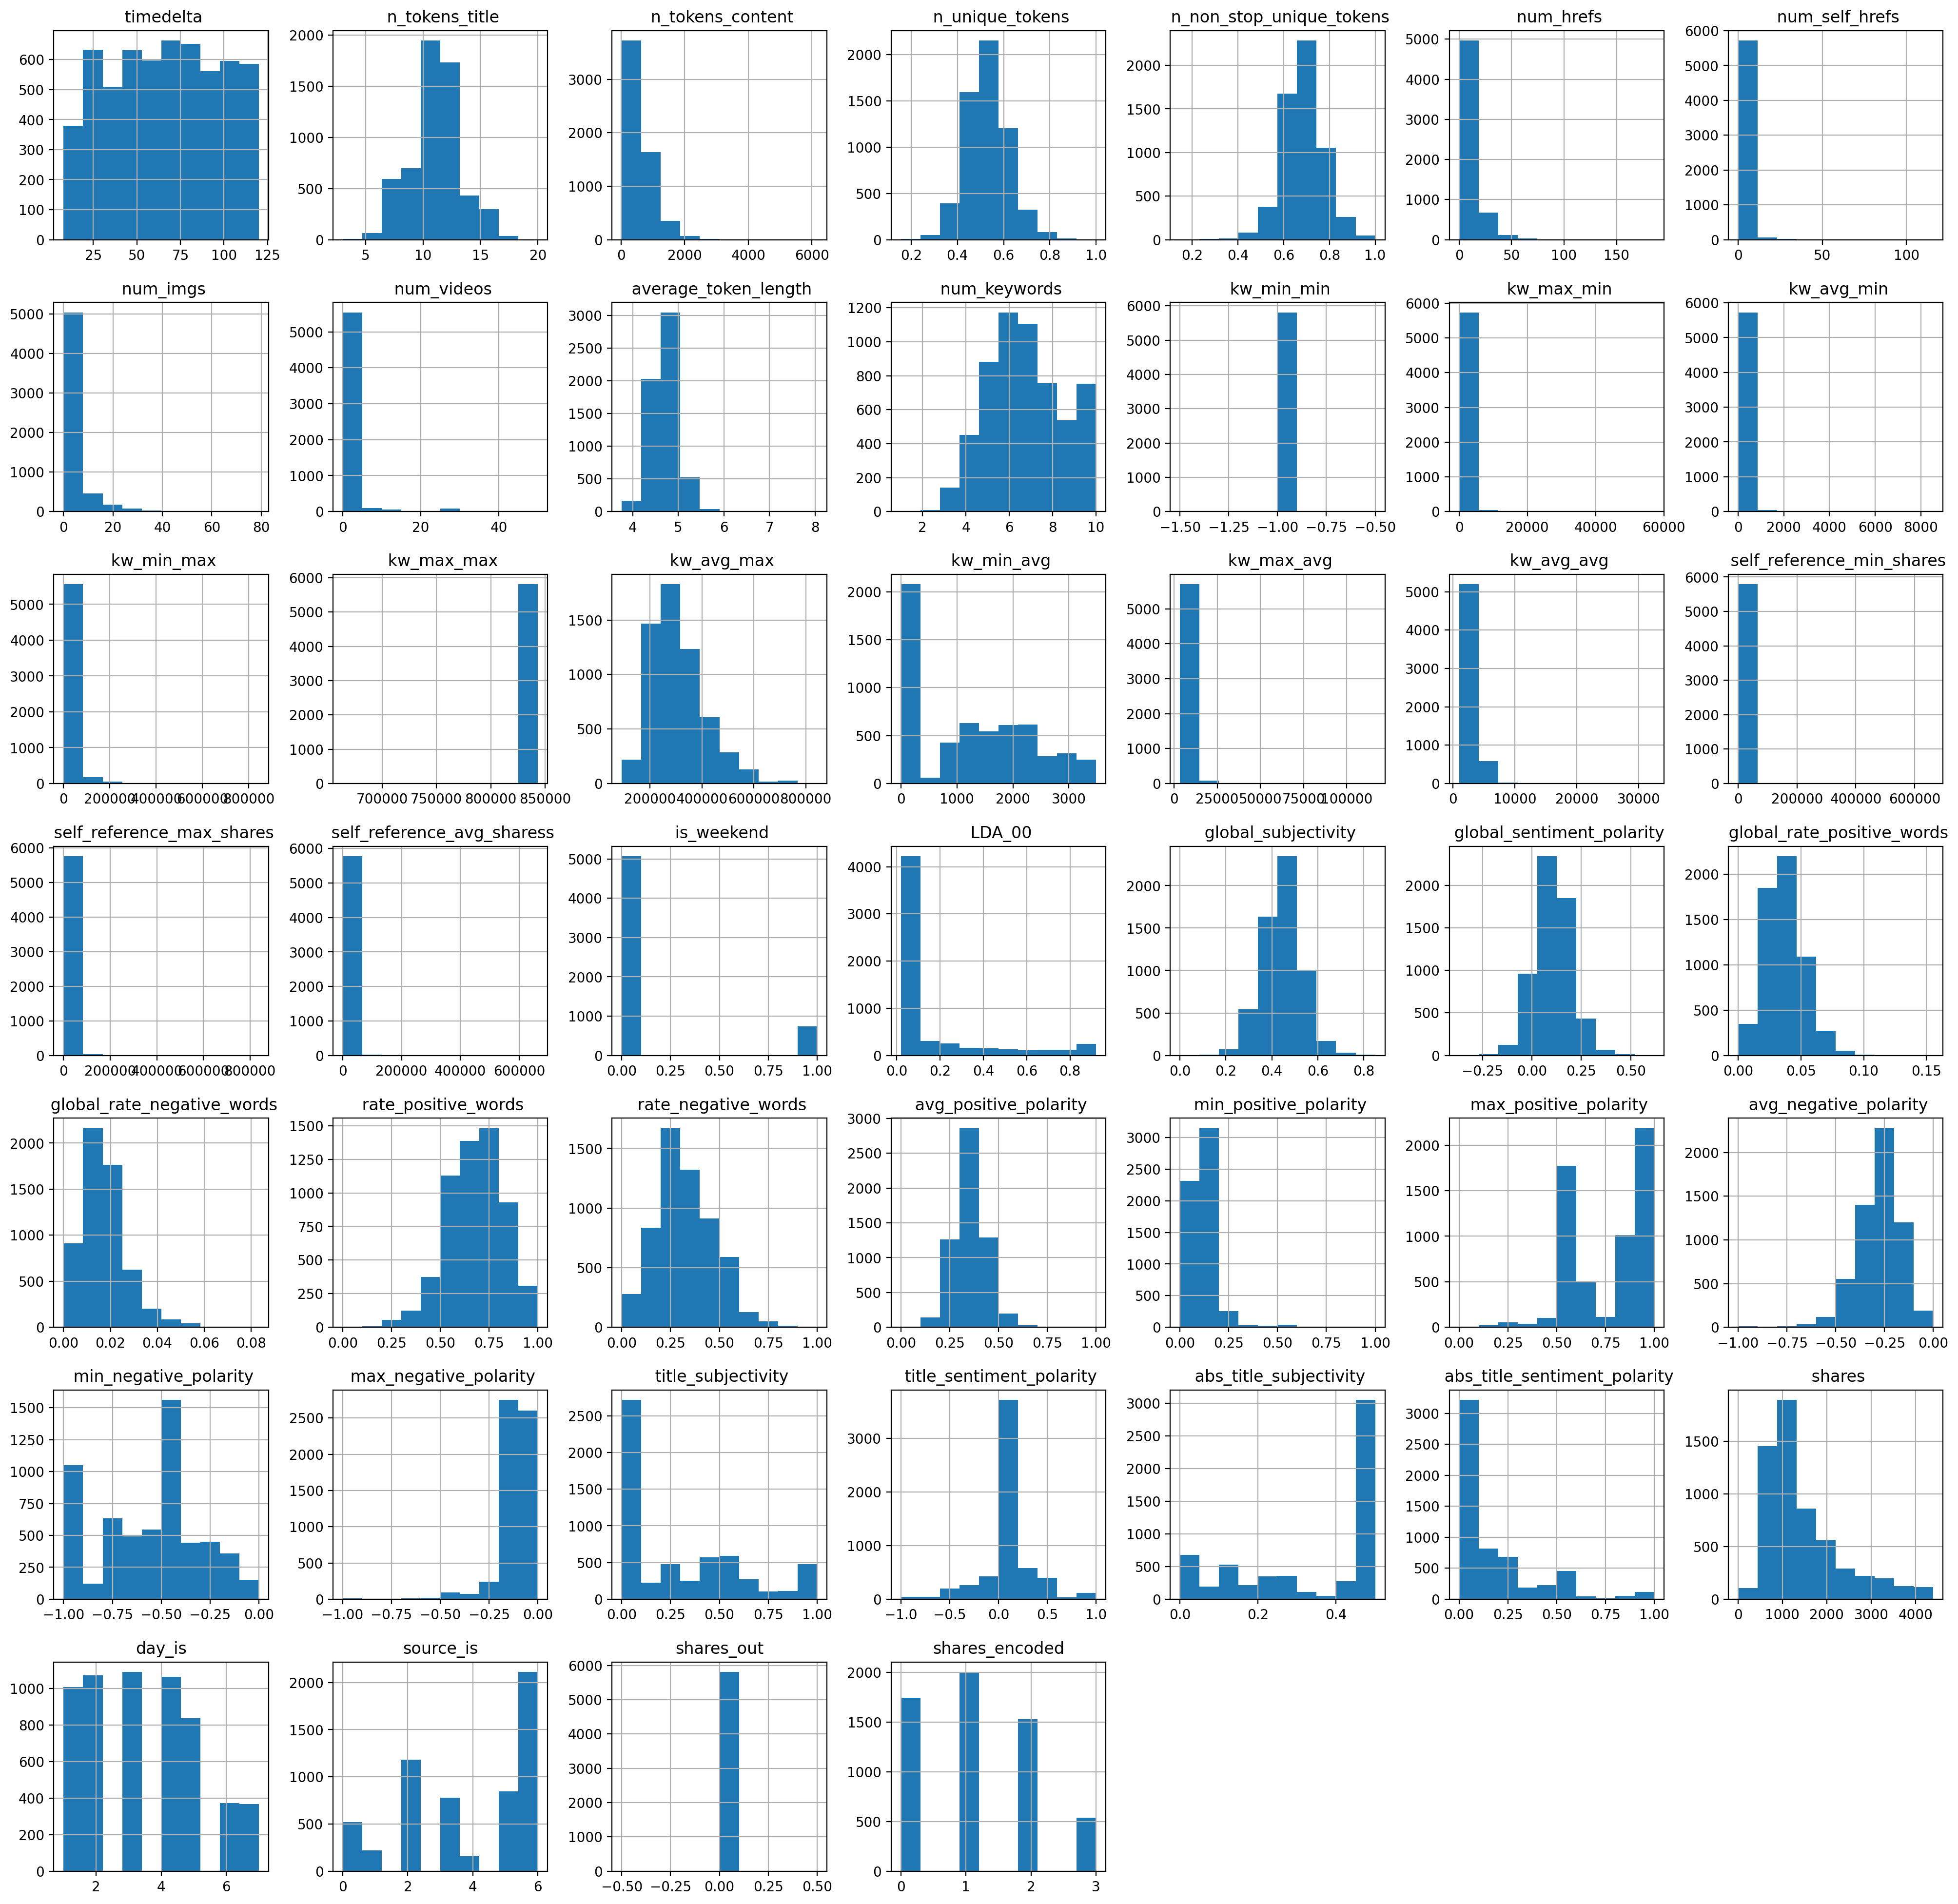

In [22]:
df_news_4m.hist(figsize=(25,25))
plt.show()

- before applying the model will make sense to check the highly correlated features and remove them if needed 

<AxesSubplot:>

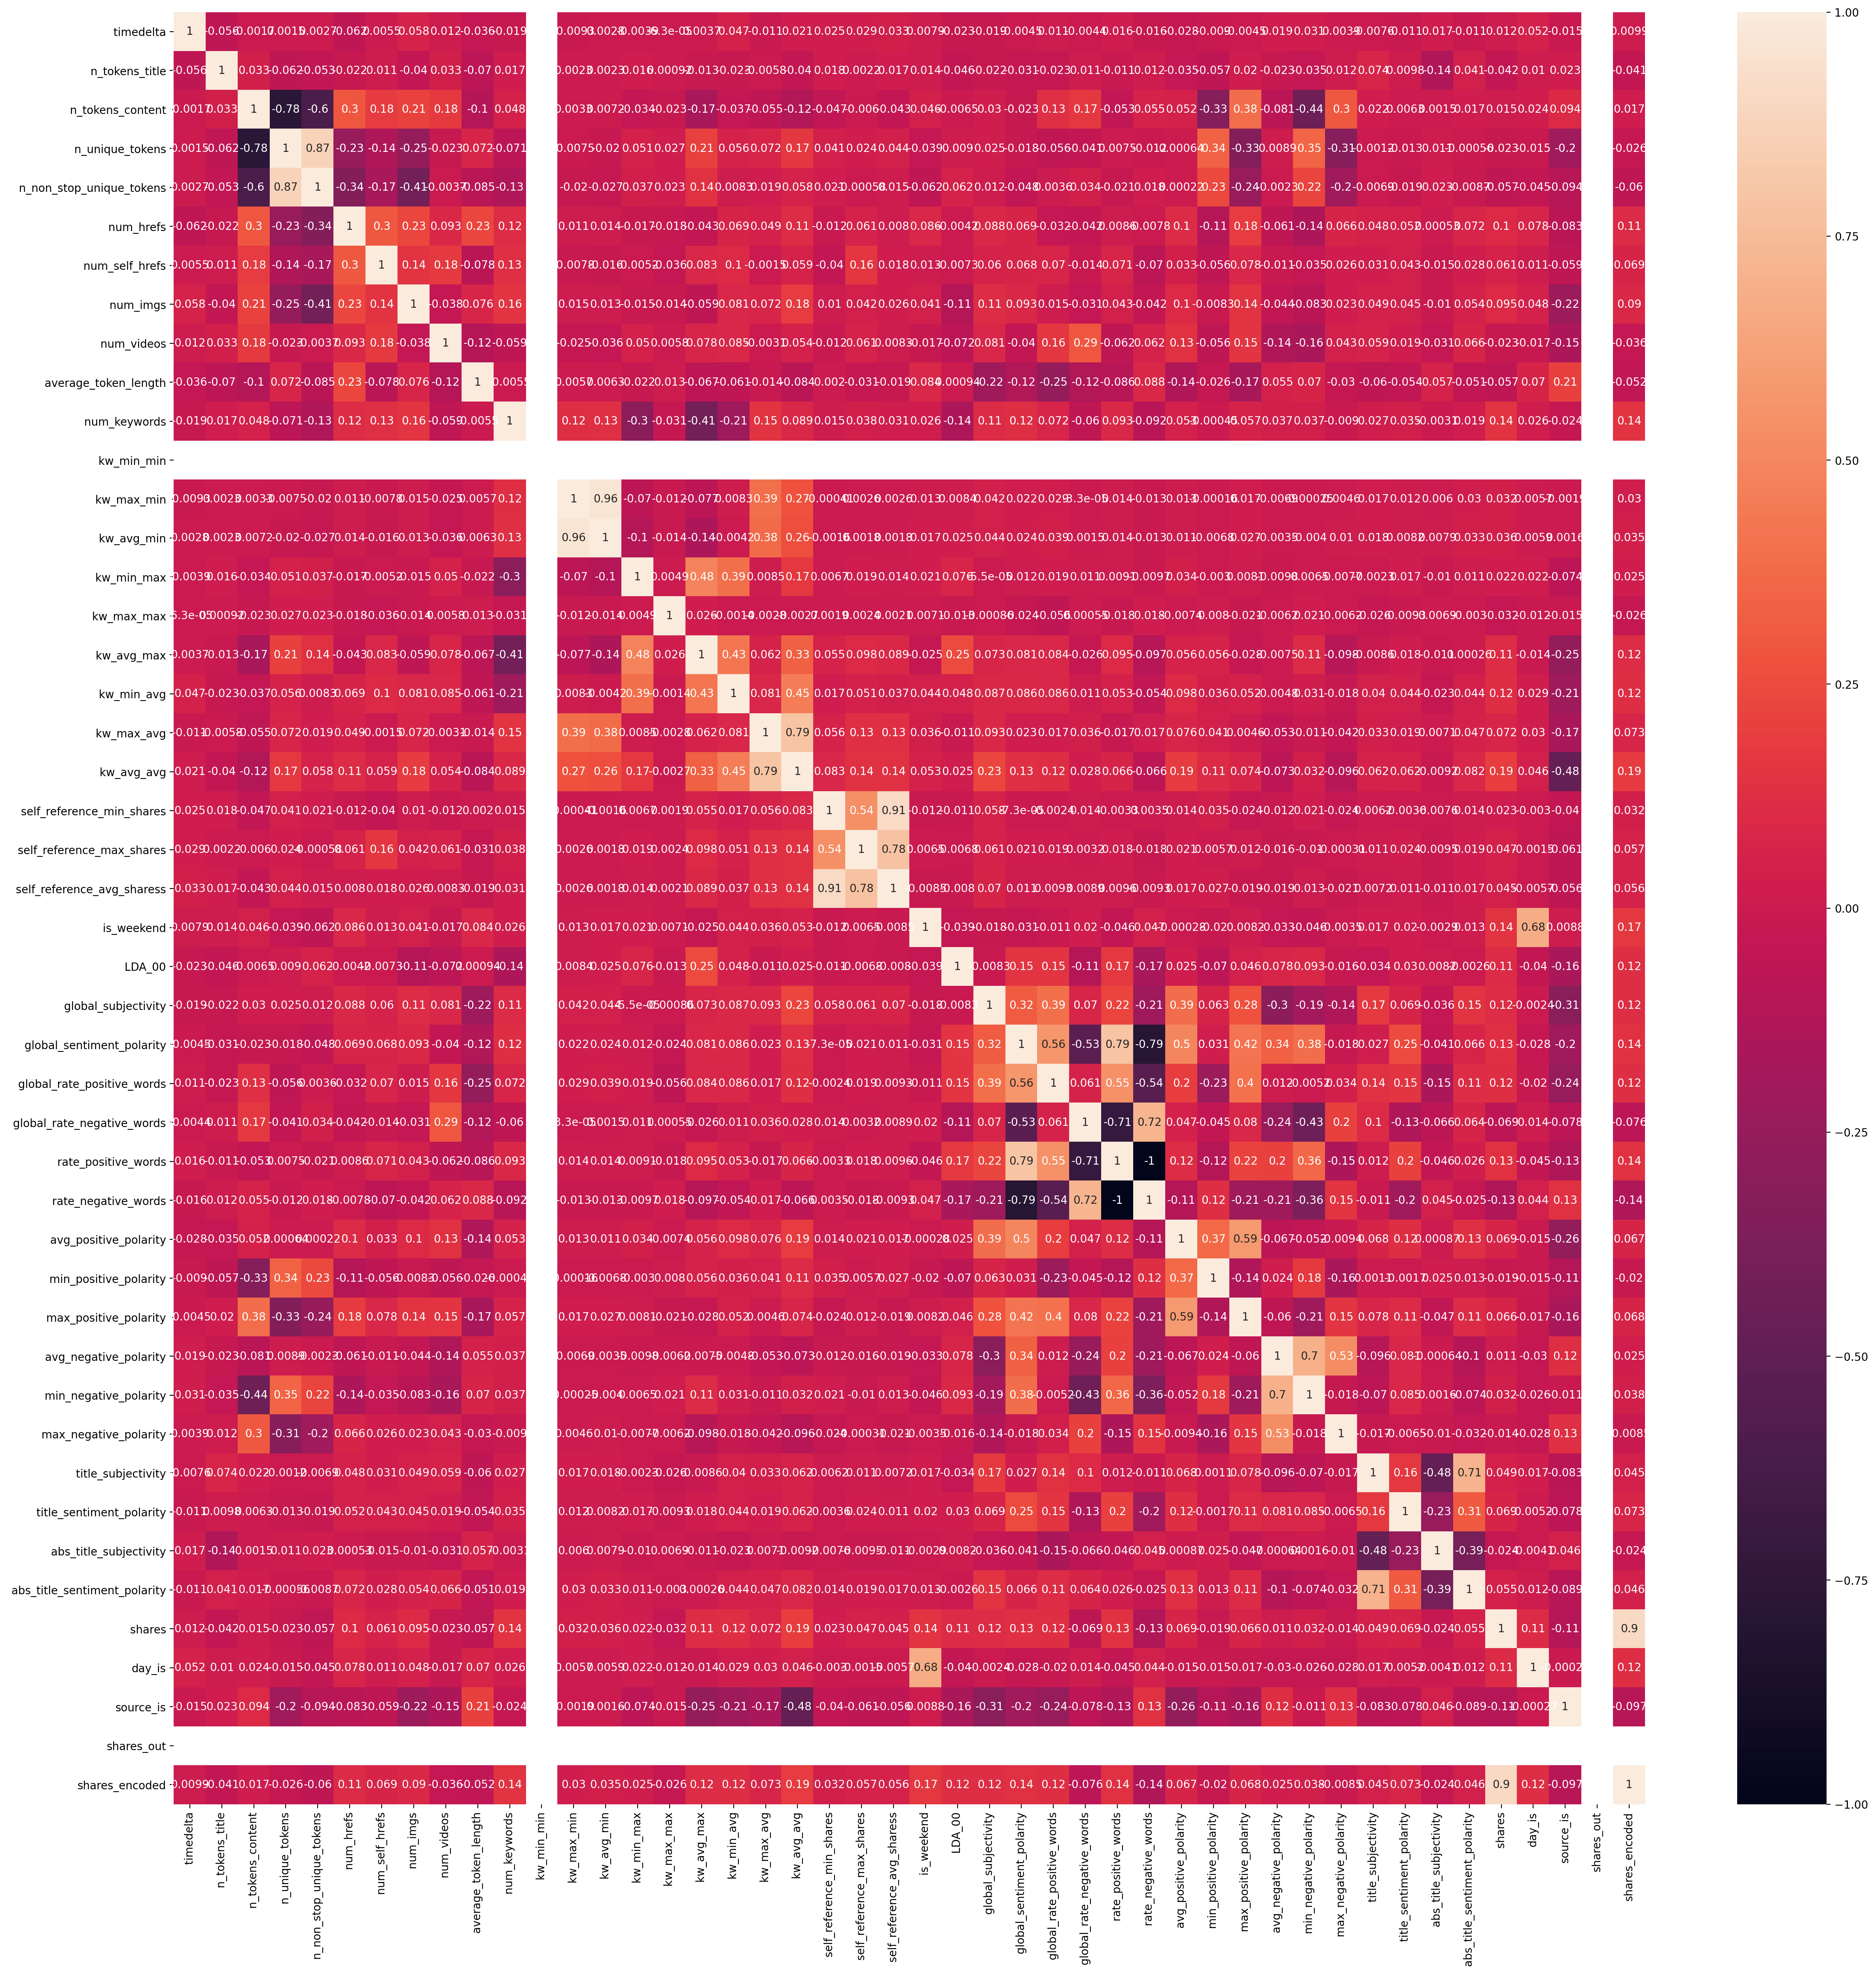

In [23]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_news_4m.corr(), vmin=-1, vmax=1, annot=True)

### Classification of Articles based on Popularity 

In [24]:
X,y = df_news_4m.drop([' timedelta',' shares','shares_out','shares_cat_label','shares_encoded',
                       ' n_non_stop_unique_tokens',' kw_min_min',' average_token_length', ' avg_positive_polarity',
                       ' kw_max_max', ' rate_positive_words'], axis=1), df_news_4m['shares_encoded']
#X,y = shuffle(X, y)

- Store and show the results in one table at the end. 

In [25]:
Model = []
Accuracy= []
F1 = []

- Split data set in train, val and test 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [27]:
print(X_train.shape)
print(y_train.shape)

(3268, 36)
(3268,)


- Check and remove highly correlated features. the removed features are: ' n_non_stop_unique_tokens',' kw_min_min',' average_token_length',' kw_max_max', ' rate_positive_words'

In [28]:
labels = X_train.columns.values
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_train_na = X_train.dropna()
for i in range(len(X_train_na.columns)):
    v=vif(np.matrix(X_train_na),i)
    print("Variance inflation factor for {}: {}".format(X_train_na.columns[i],round(v,2)))

Variance inflation factor for  n_tokens_title: 25.19
Variance inflation factor for  n_tokens_content: 7.87
Variance inflation factor for  n_unique_tokens: 60.97
Variance inflation factor for  num_hrefs: 2.8
Variance inflation factor for  num_self_hrefs: 2.1
Variance inflation factor for  num_imgs: 1.68
Variance inflation factor for  num_videos: 1.49
Variance inflation factor for  num_keywords: 19.4
Variance inflation factor for  kw_max_min: 17.36
Variance inflation factor for  kw_avg_min: 20.73
Variance inflation factor for  kw_min_max: 1.56
Variance inflation factor for  kw_avg_max: 20.65
Variance inflation factor for  kw_min_avg: 4.78
Variance inflation factor for  kw_max_avg: 12.59
Variance inflation factor for  kw_avg_avg: 66.29
Variance inflation factor for  self_reference_min_shares: 18.02
Variance inflation factor for  self_reference_max_shares: 5.47
Variance inflation factor for  self_reference_avg_sharess: 30.92
Variance inflation factor for  is_weekend: 2.15
Variance inflatio

- Starting with Logistic Regression to establish baseline for improvement later. As well it can be seen that because target feature is not well distributed, LR doesn't perform well on the least represented label 

In [29]:
scaler = RobustScaler()
cv=5 

In [30]:
t0 = time()
pipe = Pipeline(steps=[('scaler', scaler),('classifier', LogisticRegression(multi_class='auto'))]) 
param_grid = [{'classifier__max_iter': [10000]
              }]

grid_k = GridSearchCV(pipe, param_grid, return_train_score=True, cv=cv, verbose=2, n_jobs=-1)
grid_k.fit(X_train, y_train)
y_pred = grid_k.predict(X_val)
print(accuracy_score(y_val,y_pred))
print(f1_score(y_val,y_pred,average=None))
print(classification_report(y_val, y_pred))
print("done in %0.3fs" % (time() - t0))

Model.append('LogisticRegression')
Accuracy.append(accuracy_score(y_val,y_pred))
F1.append(f1_score(y_val,y_pred,average=None))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.38623853211009174
[0.4863459  0.36082474 0.35294118 0.01851852]
              precision    recall  f1-score   support

           0       0.42      0.58      0.49       324
           1       0.37      0.35      0.36       396
           2       0.35      0.35      0.35       264
           3       0.50      0.01      0.02       106

    accuracy                           0.39      1090
   macro avg       0.41      0.32      0.30      1090
weighted avg       0.39      0.39      0.36      1090

done in 1.615s


Trying various algos to improve classification 

- First: using RandomizedSearchCV to figure out best parameters - uses random selection to find best parameters (helps when big set of features as in our case) 

In [31]:
t0 = time()
pipe = Pipeline(steps=[('scaler', scaler),('over', SMOTE(random_state = 101)),('classifier', RandomForestClassifier())]) 

n_estimators = [100, 200, 300, 400, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50, 100]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
        
random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}

model_tuned = RandomizedSearchCV(pipe, param_distributions = random_grid, n_iter = 5, cv = cv, verbose=2, random_state=42 , n_jobs = -1)
model_tuned.fit(X_train,y_train)
print("done in %0.3fs" % (time() - t0))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/sterngold/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


done in 30.860s


In [32]:
print(model_tuned.best_params_)

{'classifier__n_estimators': 500, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'auto', 'classifier__max_depth': 30, 'classifier__bootstrap': False}


- Second, running the model with best parameters 

In [33]:
t0 = time()
pipe = Pipeline(steps=[('scaler', scaler),('over', SMOTE(random_state = 101)),('classifier', RandomForestClassifier())]) 
param_grid = [{'classifier__bootstrap': [False],
               'classifier__max_depth': [30],
               'classifier__max_features': ['auto'],
               'classifier__min_samples_leaf': [4], 
               'classifier__min_samples_split': [5],
               'classifier__n_estimators': [500]
              }]
grid_k = GridSearchCV(pipe, param_grid, return_train_score=True, cv=cv, verbose=2, n_jobs=-1)
grid_k.fit(X_train, y_train)
y_pred = grid_k.predict(X_val)
print(accuracy_score(y_val,y_pred))
print(f1_score(y_val,y_pred,average=None))
print(classification_report(y_val, y_pred))                   
print("done in %0.3fs" % (time() - t0))

Model.append('RandomForestClassifier')
Accuracy.append(accuracy_score(y_val,y_pred))
F1.append(f1_score(y_val,y_pred,average=None))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.3944954128440367
[0.49593496 0.32904149 0.40614334 0.1656051 ]
              precision    recall  f1-score   support

           0       0.44      0.56      0.50       324
           1       0.38      0.29      0.33       396
           2       0.37      0.45      0.41       264
           3       0.25      0.12      0.17       106

    accuracy                           0.39      1090
   macro avg       0.36      0.36      0.35      1090
weighted avg       0.38      0.39      0.38      1090

done in 16.454s


- Since we assume this is a marketing assignment for now, we will show each feature and how important it is. 
- once we are happy in production we will use some feature reduction method to gain speed 

Text(0.5, 0, 'Relative Importance')

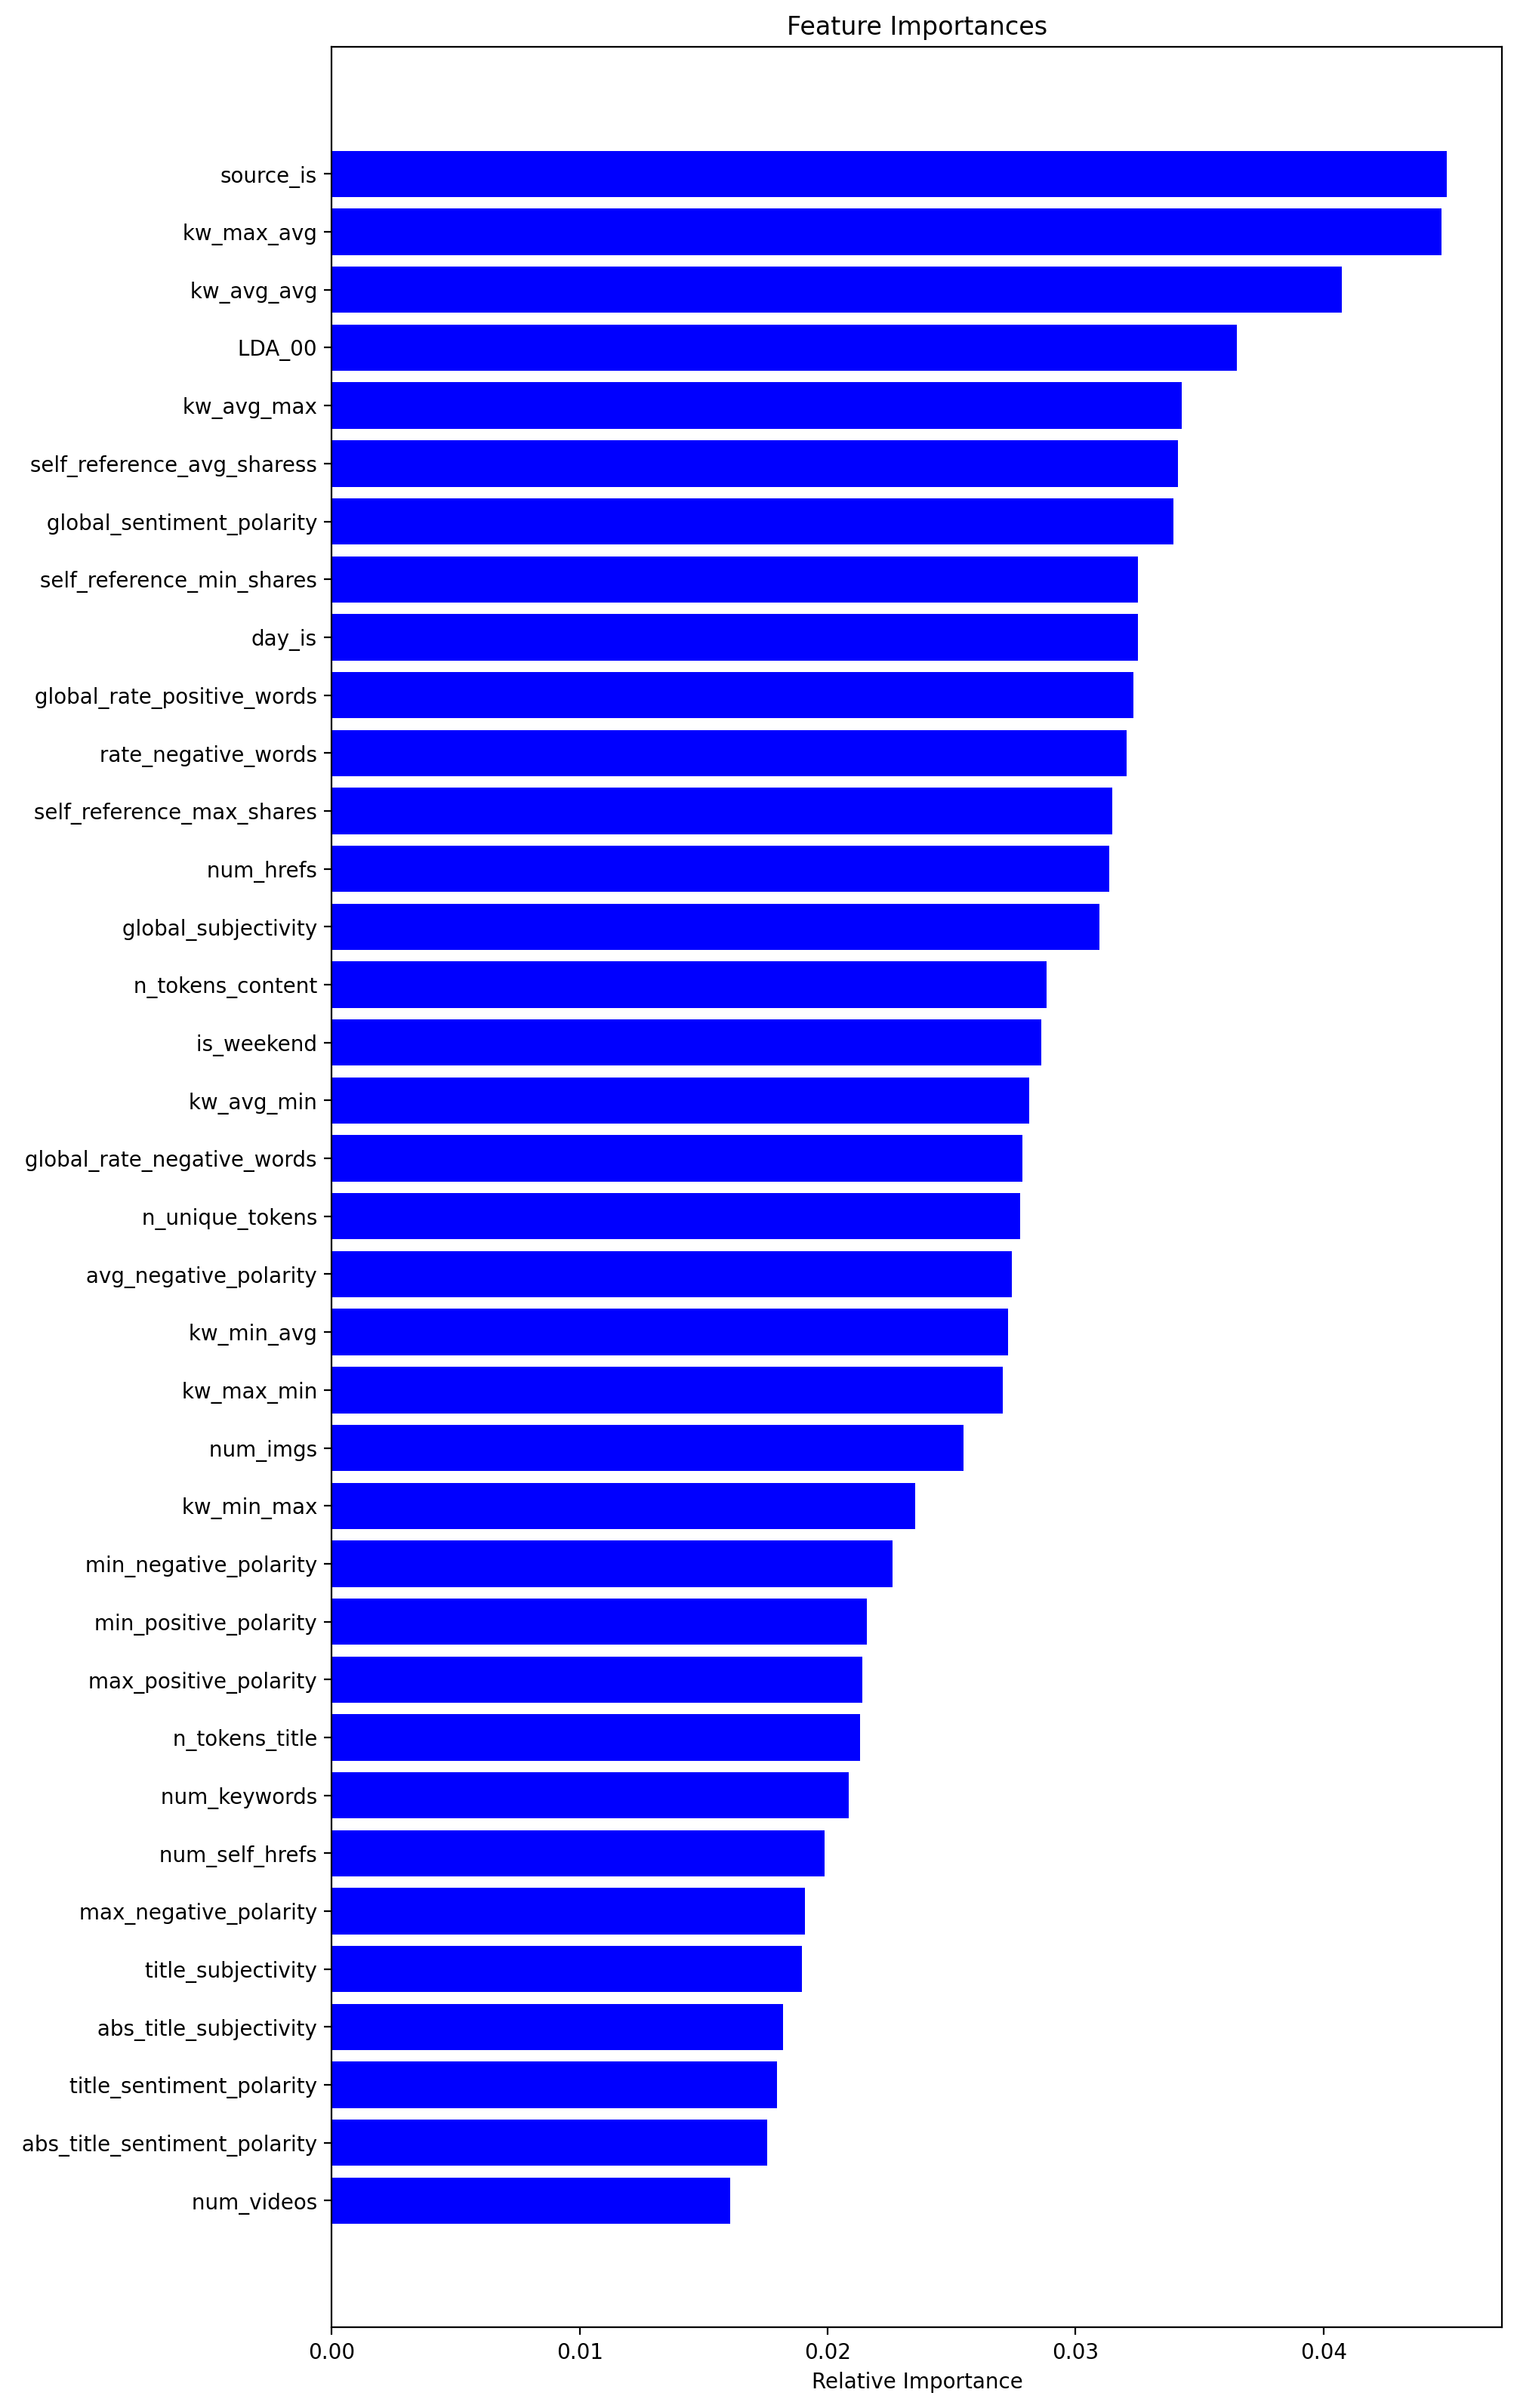

In [34]:
labels = X_train.columns
importance_score = grid_k.best_estimator_._final_estimator.feature_importances_
features = np.argsort(importance_score)
plt.figure(1,figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(features)), importance_score[features], color='blue', align='center')
plt.yticks(range(len(features)), labels[features])
plt.xlabel('Relative Importance')

In [35]:
t0 = time()
svc_pipe = Pipeline(steps=[('scaler', scaler),('over', SMOTE(random_state = 101)), ('classifier', SVC(random_state=42))])

param_grid = [{'classifier__kernel':['rbf'], 
               'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100],
               'classifier__gamma':[0.001, 0.01, 0.1, 1, 10, 100]
              }] 
grid_k_sv = GridSearchCV(svc_pipe, param_grid=param_grid, return_train_score=True, cv=cv, verbose=2, n_jobs=-1)
grid_k_sv.fit(X_train, y_train)
y_pred = grid_k_sv.predict(X_val)
print(accuracy_score(y_val,y_pred))
print(f1_score(y_val,y_pred,average=None))
print(classification_report(y_val, y_pred))  

print("done in %0.3fs" % (time() - t0))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/sterngold/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.3532110091743119
[0.40185471 0.39717979 0.2962963  0.08450704]
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       324
           1       0.37      0.43      0.40       396
           2       0.29      0.30      0.30       264
           3       0.17      0.06      0.08       106

    accuracy                           0.35      1090
   macro avg       0.31      0.30      0.29      1090
weighted avg       0.34      0.35      0.34      1090

done in 103.737s


In [36]:
print("best parameters: {}".format(grid_k_sv.best_params_))

best parameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}


In [37]:
Model.append('SVC')
Accuracy.append(accuracy_score(y_val,y_pred))
F1.append(f1_score(y_val,y_pred,average=None))

In [38]:
compare = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1':F1})
compare

Model  Accuracy  \
0      LogisticRegression  0.386239   
1  RandomForestClassifier  0.394495   
2                     SVC  0.353211   

                                                  F1  
0  [0.48634590377113135, 0.3608247422680412, 0.35...  
1  [0.4959349593495935, 0.32904148783977105, 0.40...  
2  [0.401854714064915, 0.3971797884841363, 0.2962...

## Question 2: Clustering articles on the types of words, topics and general sentiment (provided as features) and examining whether these clusters correspond with article popularity. 

From the data set used above the classify articles based on popularity, I create smaller set with features that can describe the articles. will use the new data set for clustering and see if they correspond in a meaningful way with the popularity. 

In [39]:
X = df_news_4m[[' shares',' n_tokens_content',' n_unique_tokens',
                ' average_token_length',' n_non_stop_unique_tokens',
                ' num_keywords',' num_videos',' num_imgs',' num_hrefs',
                ' global_subjectivity',' global_sentiment_polarity', 'source_is','day_is']].copy()
y = df_news_4m['shares_encoded'].copy()
n_clusters_orig = len(label_encoder.classes_)

Note: Opted out of standartiztion, in order to see the results in actual and not relative distances. Probably there is a better way to do this, couldn't figure it out. 

In [40]:
for i in range(2,6):
    km = KMeans(n_clusters=i,random_state=42).fit_predict(X)
    print("Silhouette score for {} clusters k-means : {} ".format(i,silhouette_score(X, km).round(2)))

Silhouette score for 2 clusters k-means : 0.58 
Silhouette score for 3 clusters k-means : 0.41 
Silhouette score for 4 clusters k-means : 0.43 
Silhouette score for 5 clusters k-means : 0.38 


In [41]:
km_f = KMeans(n_clusters=n_clusters_orig,n_init=50,max_iter=500,random_state=42).fit_predict(X)
X['Clusters']=list(km_f)
popularity=pd.DataFrame(X['Clusters'].value_counts()).rename(columns={'Clusters':'Clusters of popularity'})
popularity.T

3     0    1    2
Clusters of popularity  3020  1271  864  656

In [42]:
print("Adjusted_rand_score:",round(adjusted_rand_score(y, km_f),2))
print("Adjusted_mutual_info_score:",round(adjusted_mutual_info_score(y, km_f),2))

Adjusted_rand_score: 0.46
Adjusted_mutual_info_score: 0.59


In [43]:
X.set_index('Clusters')
grouped=X.groupby(by='Clusters').mean().round(3)
#grouped.sort_values(' shares')
grouped

shares   n_tokens_content   n_unique_tokens  \
Clusters                                                  
0         1939.969            508.580             0.542   
1         1112.095           1326.117             0.424   
2         3381.250            617.125             0.527   
3          939.815            447.189             0.556   

           average_token_length   n_non_stop_unique_tokens   num_keywords  \
Clusters                                                                    
0                         4.701                      0.690          7.105   
1                         4.624                      0.607          6.894   
2                         4.670                      0.678          7.288   
3                         4.736                      0.706          6.648   

           num_videos   num_imgs   num_hrefs   global_subjectivity  \
Clusters                                                             
0               0.969      3.840      11.192                 0.455   
1               3.156      5.508      15.208                 0.451   
2               1.155      4.788      12.530                 0.465   
3               0.777      2.721       8.645                 0.436   

           global_sentiment_polarity  source_is  day_is  
Clusters                                                 
0                              0.119      3.614   3.565  
1                              0.094      4.010   3.348  
2                              0.123      3.441   3.735  
3                              0.098      4.015   3.244

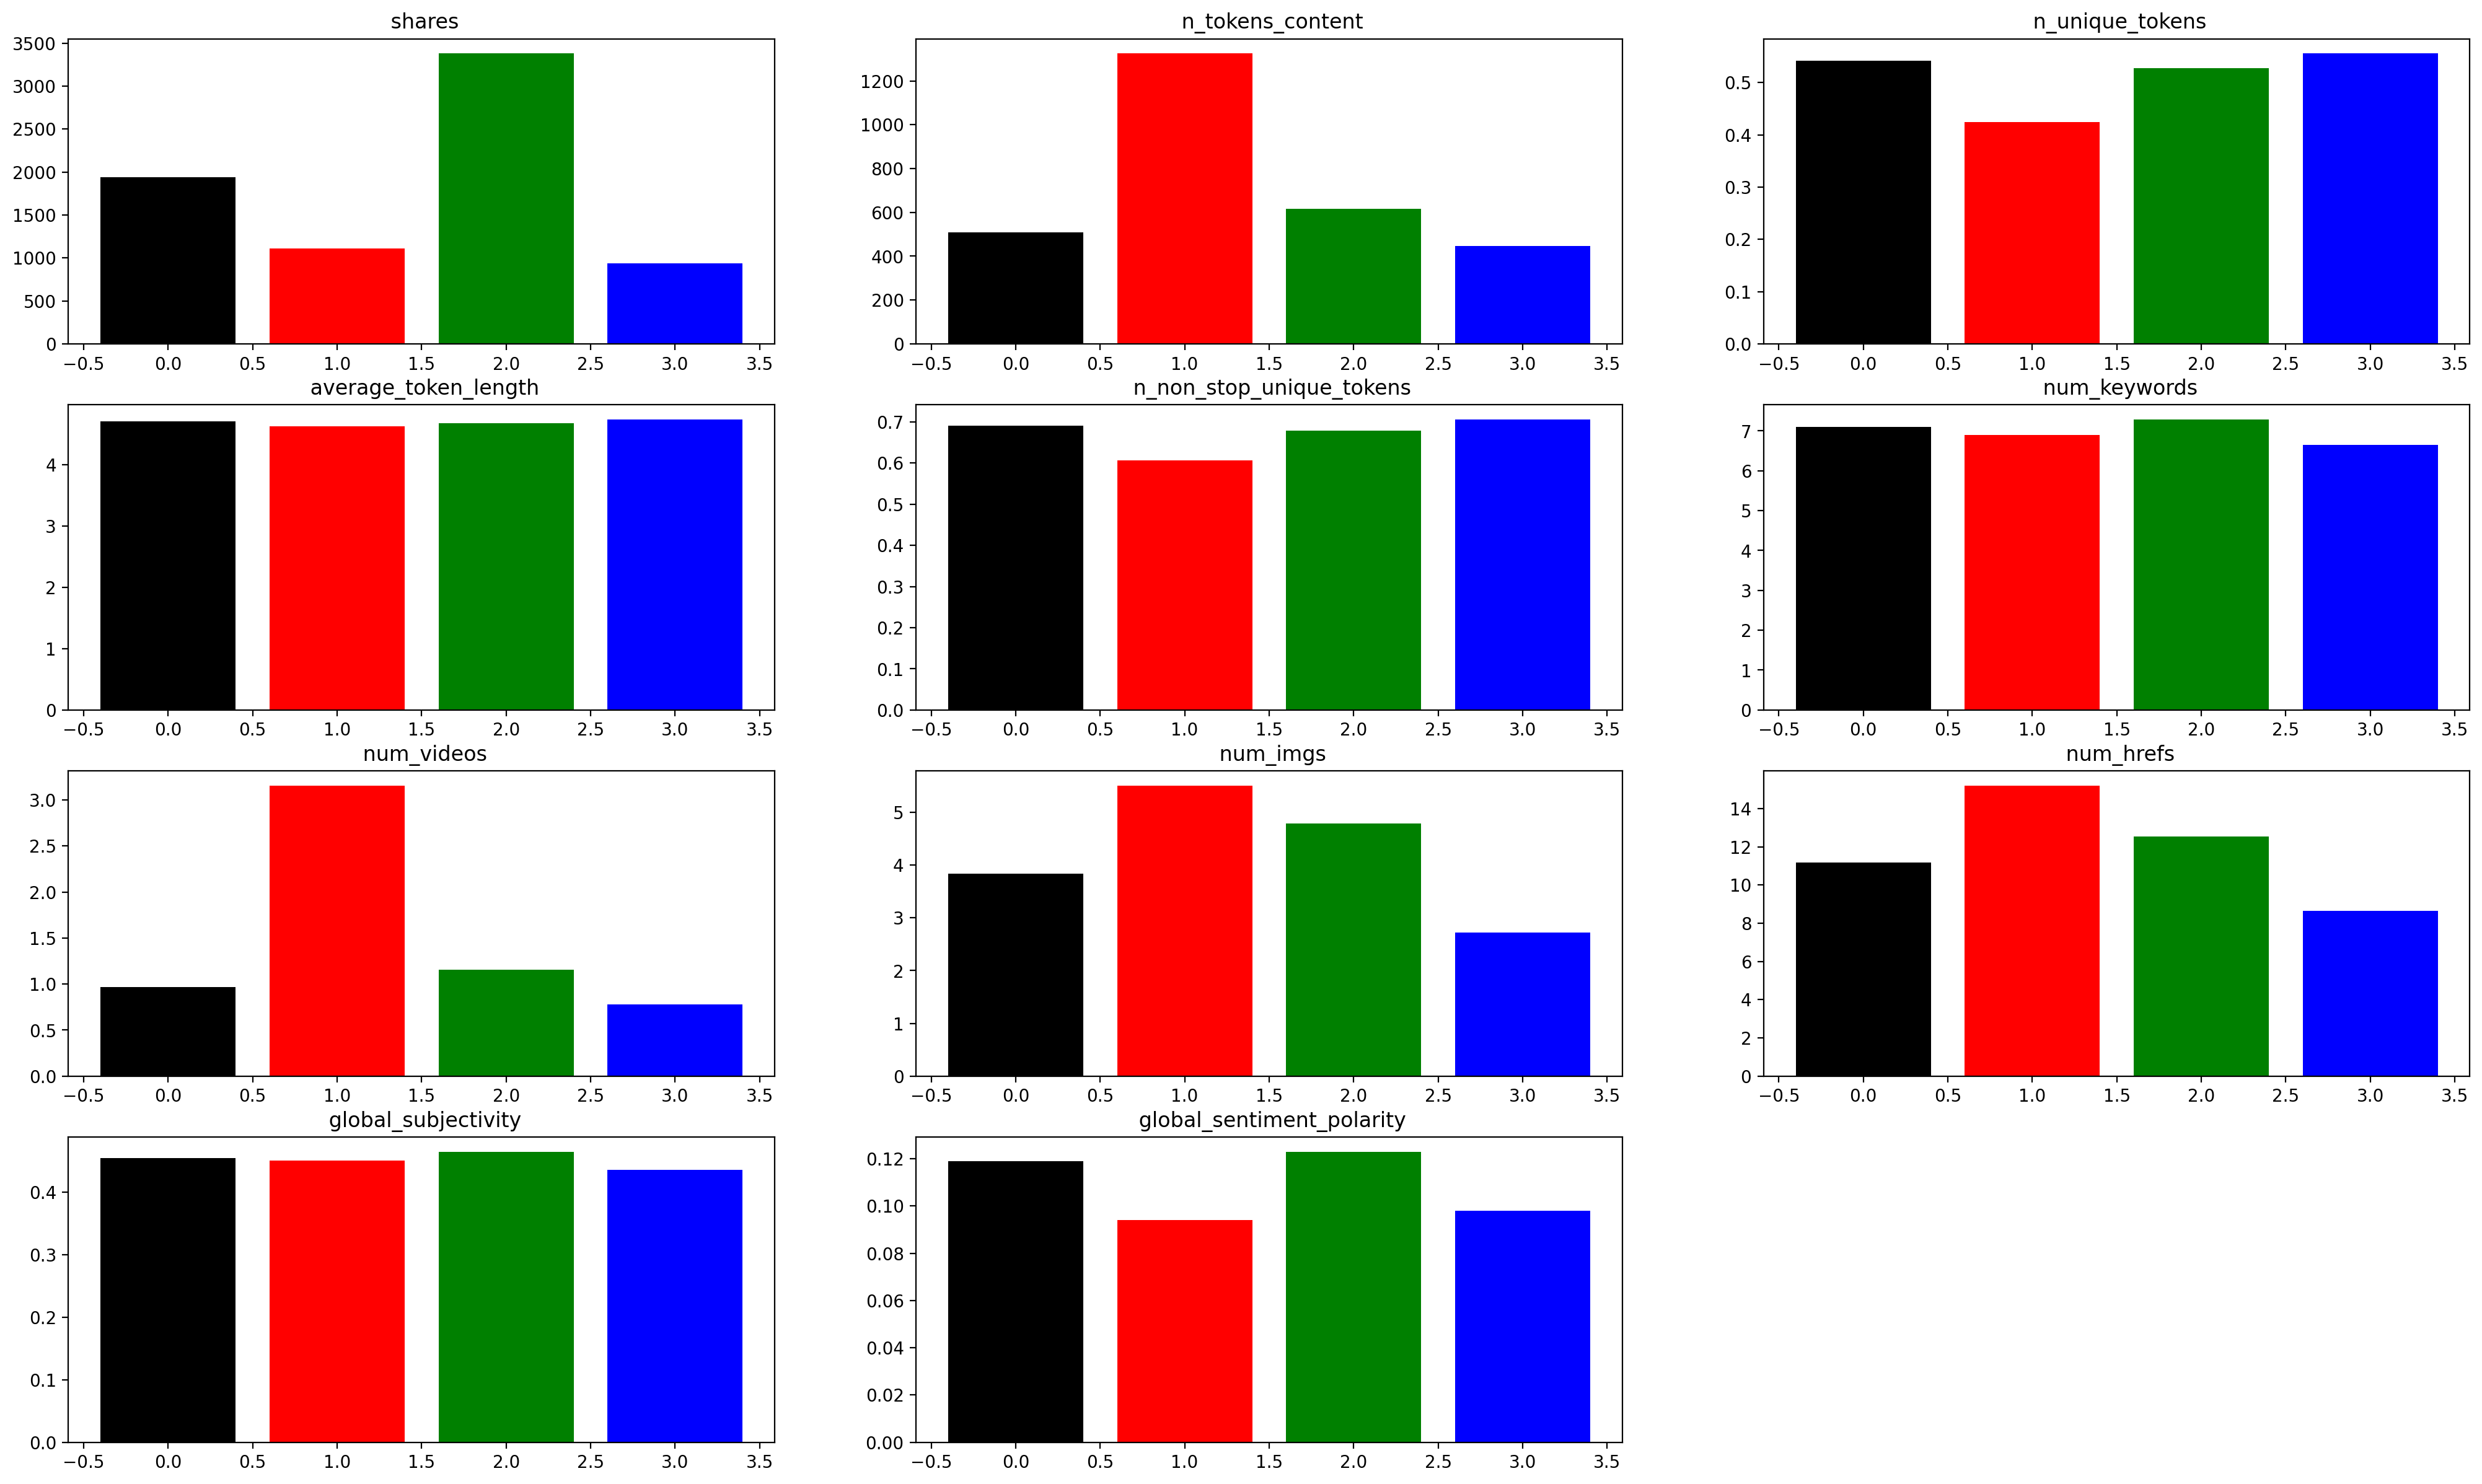

In [44]:
features=[' shares',' n_tokens_content',' n_unique_tokens',
                ' average_token_length',' n_non_stop_unique_tokens',
                ' num_keywords',' num_videos',' num_imgs',' num_hrefs',
                ' global_subjectivity',' global_sentiment_polarity']
plt.figure(figsize=(25,15))
for x,y in enumerate(features):
    plt.subplot(4,3,x+1)
    plt.bar(grouped.index,grouped[y],color=['black', 'red', 'green', 'blue'])
    plt.title(y)
plt.show()

In [45]:
X2 = X[X['Clusters']==1]
X2.groupby('source_is').count()

shares   n_tokens_content   n_unique_tokens  \
source_is                                                 
0.0             16                 16                16   
1.0             41                 41                41   
2.0            263                263               263   
3.0             79                 79                79   
4.0             13                 13                13   
5.0            103                103               103   
6.0            349                349               349   

            average_token_length   n_non_stop_unique_tokens   num_keywords  \
source_is                                                                    
0.0                           16                         16             16   
1.0                           41                         41             41   
2.0                          263                        263            263   
3.0                           79                         79             79   
4.0                           13                         13             13   
5.0                          103                        103            103   
6.0                          349                        349            349   

            num_videos   num_imgs   num_hrefs   global_subjectivity  \
source_is                                                             
0.0                 16         16          16                    16   
1.0                 41         41          41                    41   
2.0                263        263         263                   263   
3.0                 79         79          79                    79   
4.0                 13         13          13                    13   
5.0                103        103         103                   103   
6.0                349        349         349                   349   

            global_sentiment_polarity  day_is  Clusters  
source_is                                                
0.0                                16      16        16  
1.0                                41      41        41  
2.0                               263     263       263  
3.0                                79      79        79  
4.0                                13      13        13  
5.0                               103     103       103  
6.0                               349     349       349

## Question 3: Experimenting with unsupervised machine learning techniques, such as clustering, to identify trends in the data

Importing from Lecture 6 the visualsiation of cluster evaluation function (Source: UvA)

In [46]:
def silhouette_plot(X, cluster_labels, ax=None):
    silhouette_scores = silhouette_samples(X, cluster_labels)
    if ax is None:
        ax = plt.gca()
    y_lower = 10
    inliers = cluster_labels != -1
    X = X[inliers]
    cluster_labels = cluster_labels[inliers]
    silhouette_scores = silhouette_scores[inliers]
    labels = np.unique(cluster_labels)
#     cm = plt.cm.Vega10 if len(labels) <= 10 else plt.cm.Vega20
    cm = plt.cm.tab10 if len(labels) <= 10 else plt.cm.tab20

    for i in labels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            silhouette_scores[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

- Main assumption here is that, more clusters will be more useful to writers and marketeers.
- removing most outliers based on shares column. I assume those articles that have highest number of shares are the ones with all the outliers in the other columns 
- I do suspect that the scaler doesn't do a good job as this data set will benefit not from one global scaler but will different standartization methods should be applied on groups of features.  

In [47]:
df_news_clust = df_news.drop([' timedelta'], axis=1)

i = df_news_clust[' shares']
iqr = stats.iqr(i) 
lower, upper = (np.percentile(i, 25)-1.5*iqr), (np.percentile(i,75)+1.5*iqr)
df_news_clust['shares_out'] = df_news_clust[' shares'].apply(lambda x : 1 if x < lower or x > upper else 0)
df_news_clust.groupby('shares_out').count()

n_tokens_title   n_tokens_content   n_unique_tokens  \
shares_out                                                         
0                     33940              33940             33940   
1                      4523               4523              4523   

             n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
shares_out                                                                      
0                               33940       33940            33940      33940   
1                                4523        4523             4523       4523   

             num_videos   average_token_length   num_keywords   kw_min_min  \
shares_out                                                                   
0                 33940                  33940          33940        33940   
1                  4523                   4523           4523         4523   

             kw_max_min   kw_avg_min   kw_min_max   kw_max_max   kw_avg_max  \
shares_out                                                                    
0                 33940        33940        33940        33940        33940   
1                  4523         4523         4523         4523         4523   

             kw_min_avg   kw_max_avg   kw_avg_avg   self_reference_min_shares  \
shares_out                                                                      
0                 33940        33940        33940                       33940   
1                  4523         4523         4523                        4523   

             self_reference_max_shares   self_reference_avg_sharess  \
shares_out                                                            
0                                33940                        33940   
1                                 4523                         4523   

             is_weekend   LDA_00   global_subjectivity  \
shares_out                                               
0                 33940    33940                 33940   
1                  4523     4523                  4523   

             global_sentiment_polarity   global_rate_positive_words  \
shares_out                                                            
0                                33940                        33940   
1                                 4523                         4523   

             global_rate_negative_words   rate_positive_words  \
shares_out                                                      
0                                 33940                 33940   
1                                  4523                  4523   

             rate_negative_words   avg_positive_polarity  \
shares_out                                                 
0                          33940                   33940   
1                           4523                    4523   

             min_positive_polarity   max_positive_polarity  \
shares_out                                                   
0                            33940                   33940   
1                             4523                    4523   

             avg_negative_polarity   min_negative_polarity  \
shares_out                                                   
0                            33940                   33940   
1                             4523                    4523   

             max_negative_polarity   title_subjectivity  \
shares_out                                                
0                            33940                33940   
1                             4523                 4523   

             title_sentiment_polarity   abs_title_subjectivity  \
shares_out                                                       
0                               33940                    33940   
1                                4523                     4523   

             abs_title_sentiment_polarity   shares  day_is  source_is  
shares_out                                                             
0          

In [48]:
X_trim = df_news_clust[df_news_clust['shares_out'] != 1]
X_trim[' shares'].describe()

count    33940.000000
mean      1648.020949
std       1066.164402
min          1.000000
25%        901.750000
50%       1300.000000
75%       2100.000000
max       5300.000000
Name:  shares, dtype: float64

In [50]:
X_trim = X_trim.drop(['shares_out'], axis=1)

In [51]:
X_scale_trim = scaler.fit_transform(X_trim)

In [52]:
for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=42).fit_predict(X_scale_trim)
    print("Silhouette score for {} clusters k-means : {} ".format(i,silhouette_score(X_scale_trim, km).round(2)))

Silhouette score for 2 clusters k-means : 0.92 
Silhouette score for 3 clusters k-means : 0.97 
Silhouette score for 4 clusters k-means : 1.0 
Silhouette score for 5 clusters k-means : 0.99 
Silhouette score for 6 clusters k-means : 0.98 
Silhouette score for 7 clusters k-means : 0.98 
Silhouette score for 8 clusters k-means : 0.98 
Silhouette score for 9 clusters k-means : 0.99 
Silhouette score for 10 clusters k-means : 0.99 


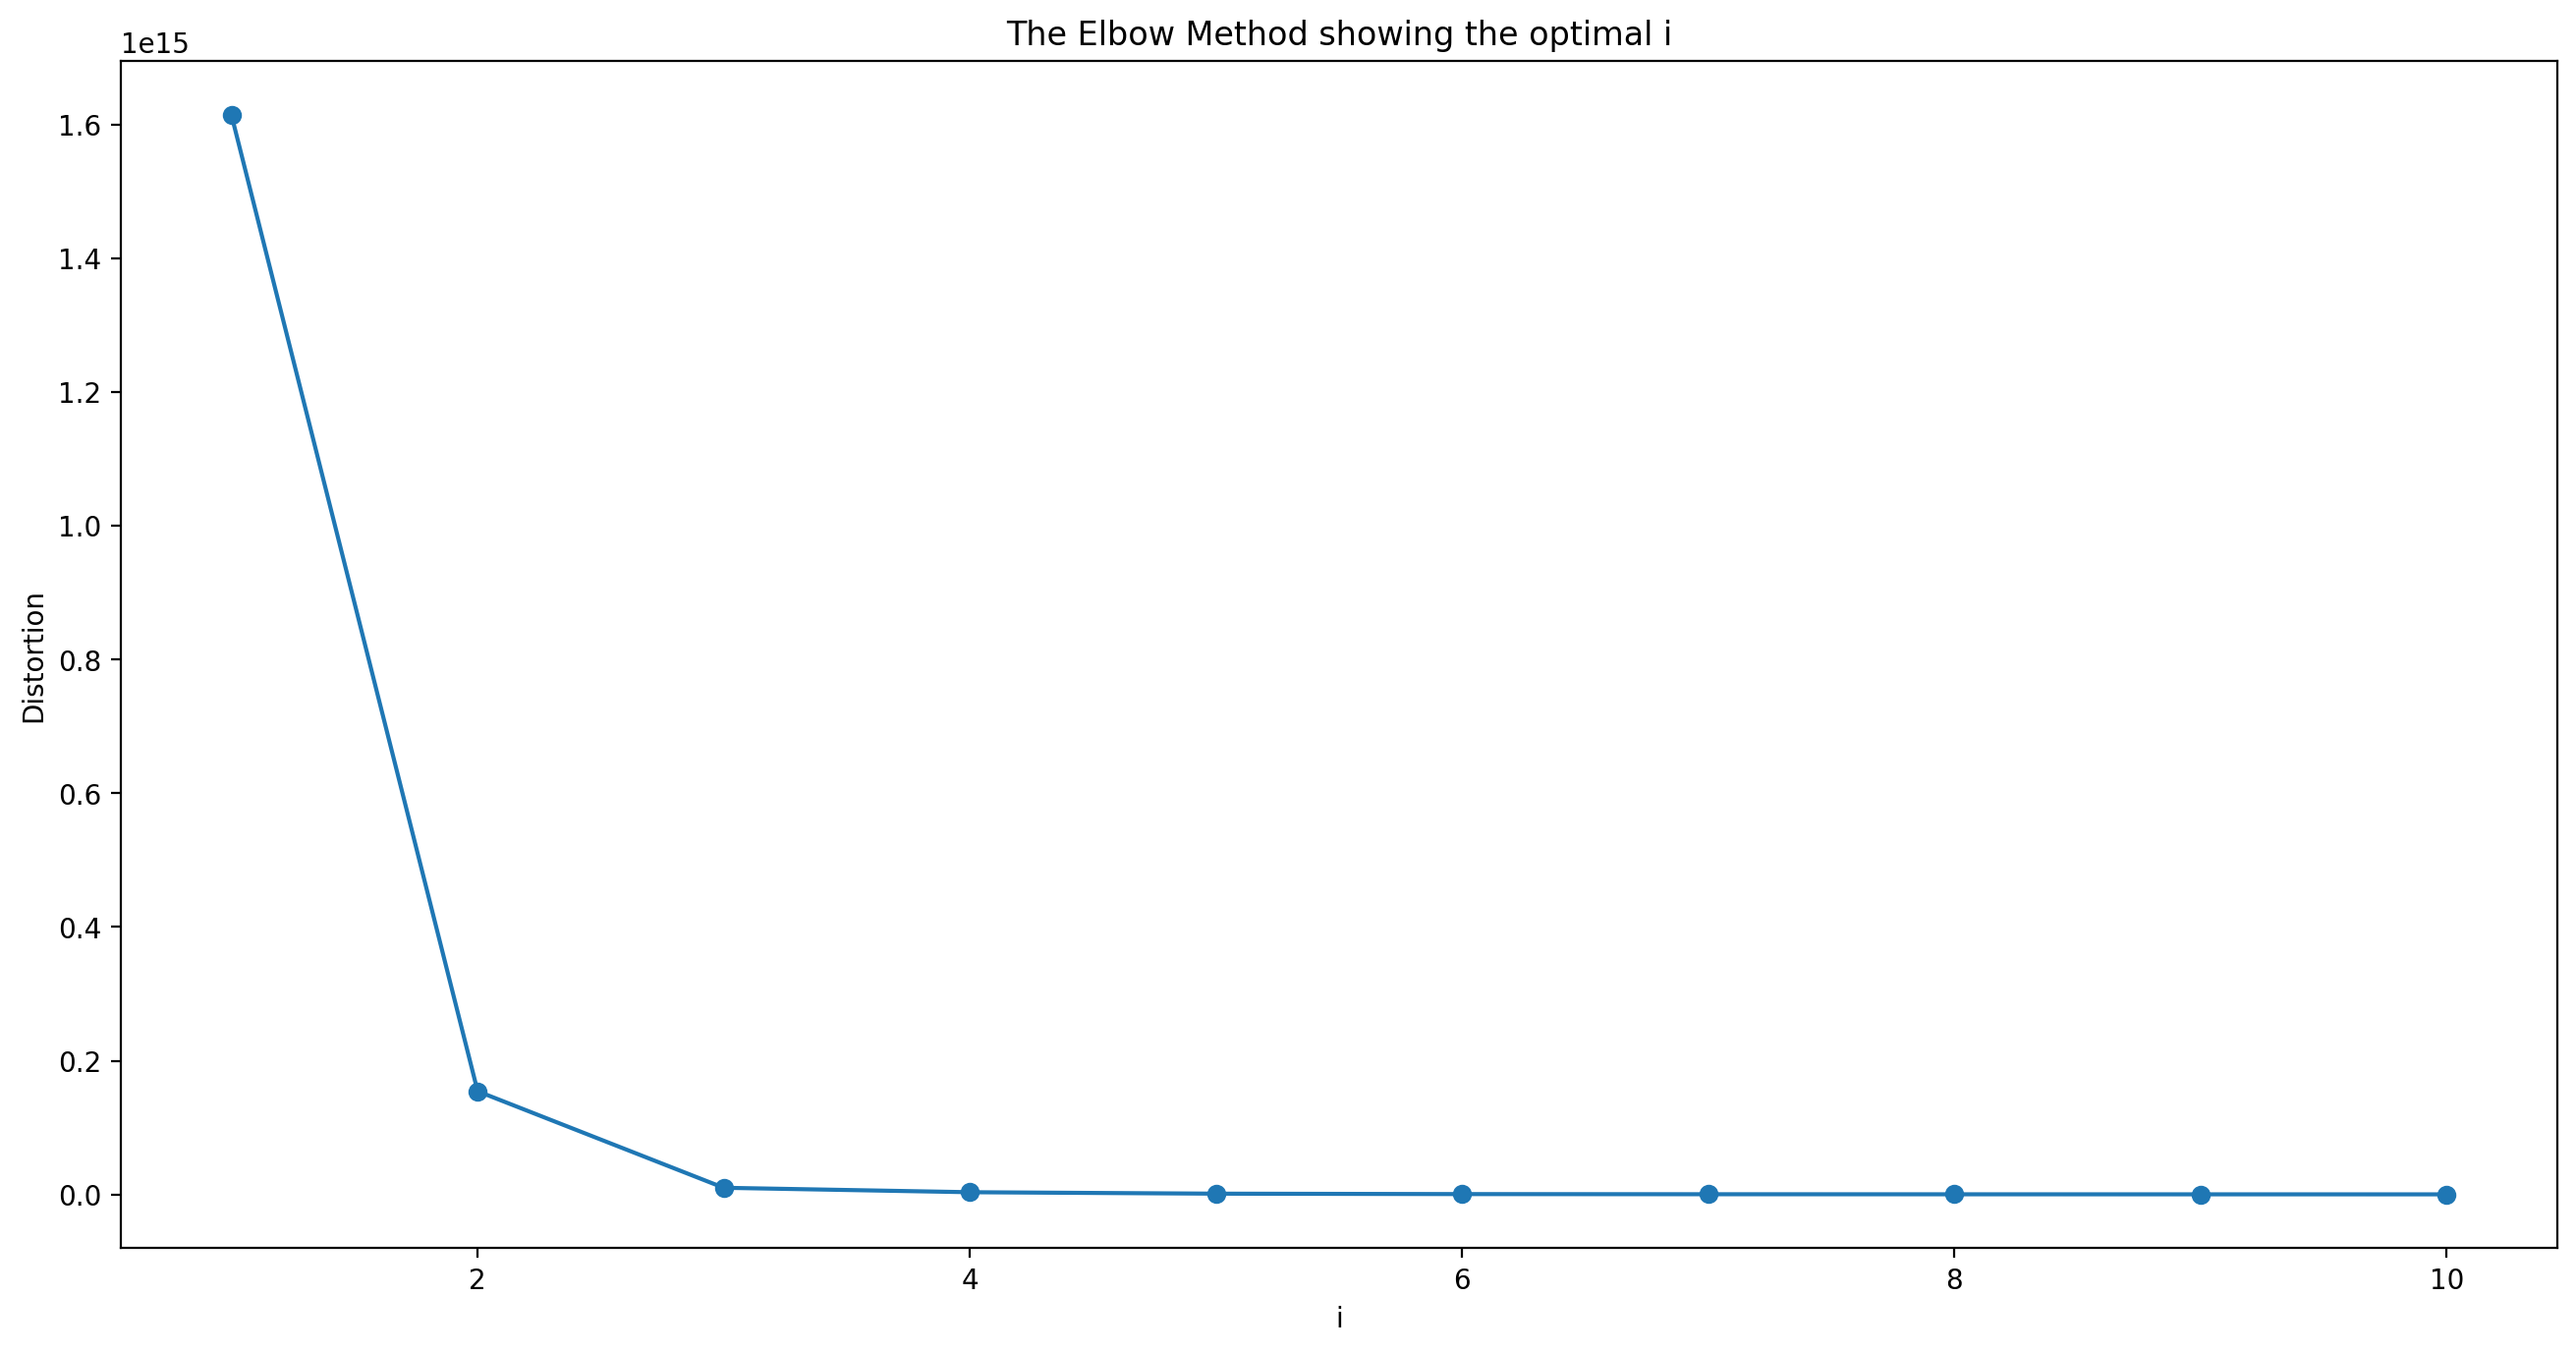

In [53]:
distortions = []
for i in range(1,11):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(X_scale_trim)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('i')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal i')
plt.show()

In [54]:
km_f = KMeans(n_clusters=2,n_init=50,max_iter=500,random_state=42).fit_predict(X_scale_trim)
X_trim['Clusters']=list(km_f)
popularity=pd.DataFrame(X_trim['Clusters'].value_counts()).rename(columns={'Clusters':'Clusters of popularity'})
popularity.T

0     1
Clusters of popularity  31104  2836

In [55]:
X_trim.set_index('Clusters')
grouped=X_trim.groupby(by='Clusters').mean().round(3)
grouped.sort_values(' shares')

n_tokens_title   n_tokens_content   n_unique_tokens  \
Clusters                                                         
0                  10.439            569.184             0.545   
1                   9.851            477.171             0.568   

           n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
Clusters                                                                      
0                             0.692      11.010            3.397      4.426   
1                             0.713       9.183            3.259      3.437   

           num_videos   average_token_length   num_keywords   kw_min_min  \
Clusters                                                                   
0               1.187                  4.693          7.187       10.108   
1               1.301                  4.661          7.228      209.987   

           kw_max_min   kw_avg_min   kw_min_max   kw_max_max   kw_avg_max  \
Clusters                                                                    
0            1120.164      293.151    13942.658   811758.163   273440.208   
1            1138.292      475.305     2284.951    62288.717    26098.678   

           kw_min_avg   kw_max_avg   kw_avg_avg   self_reference_min_shares  \
Clusters                                                                      
0            1120.032     5555.811     3102.548                    3872.226   
1             551.034     3810.200     2150.545                    1935.804   

           self_reference_max_shares   self_reference_avg_sharess  \
Clusters                                                            
0                          10311.159                     6312.611   
1                           4596.170                     2871.854   

           is_weekend   LDA_00   global_subjectivity  \
Clusters                                               
0               0.128    0.188                 0.454   
1               0.104    0.204                 0.457   

           global_sentiment_polarity   global_rate_positive_words  \
Clusters                                                            
0                              0.120                        0.040   
1                              0.143                        0.045   

           global_rate_negative_words   rate_positive_words  \
Clusters                                                      
0                               0.017                 0.701   
1                               0.016                 0.731   

           rate_negative_words   avg_positive_polarity  \
Clusters                                                 
0                        0.299                   0.362   
1                        0.269                   0.370   

           min_positive_polarity   max_positive_polarity  \
Clusters                                                   
0                          0.098                   0.776   
1                          0.101                   0.776   

           avg_negative_polarity   min_negative_polarity  \
Clusters                                                   
0                         -0.266                  -0.538   
1                         -0.254                  -0.483   

           max_negative_polarity   title_subjectivity  \
Clusters                                                
0                         -0.110                0.275   
1                         -0.115                0.279   

           title_sentiment_polarity   abs_title_subjectivity  \
Clusters                                                       
0                             0.066                    0.342   
1                             0.093                    0.344   

           abs_title_sentiment_polarity    shares  day_is  source_is  
Clusters                                                              
0                                  0.15  1644.045   3.404      3.485  
1                                  0.16  1691.628   

Using TSNE method to reduce data features and to select good candidate for cluster numbers

In [65]:
tsne = TSNE(n_components=2, n_iter=300)
X_t = tsne.fit_transform(X_scale_trim)

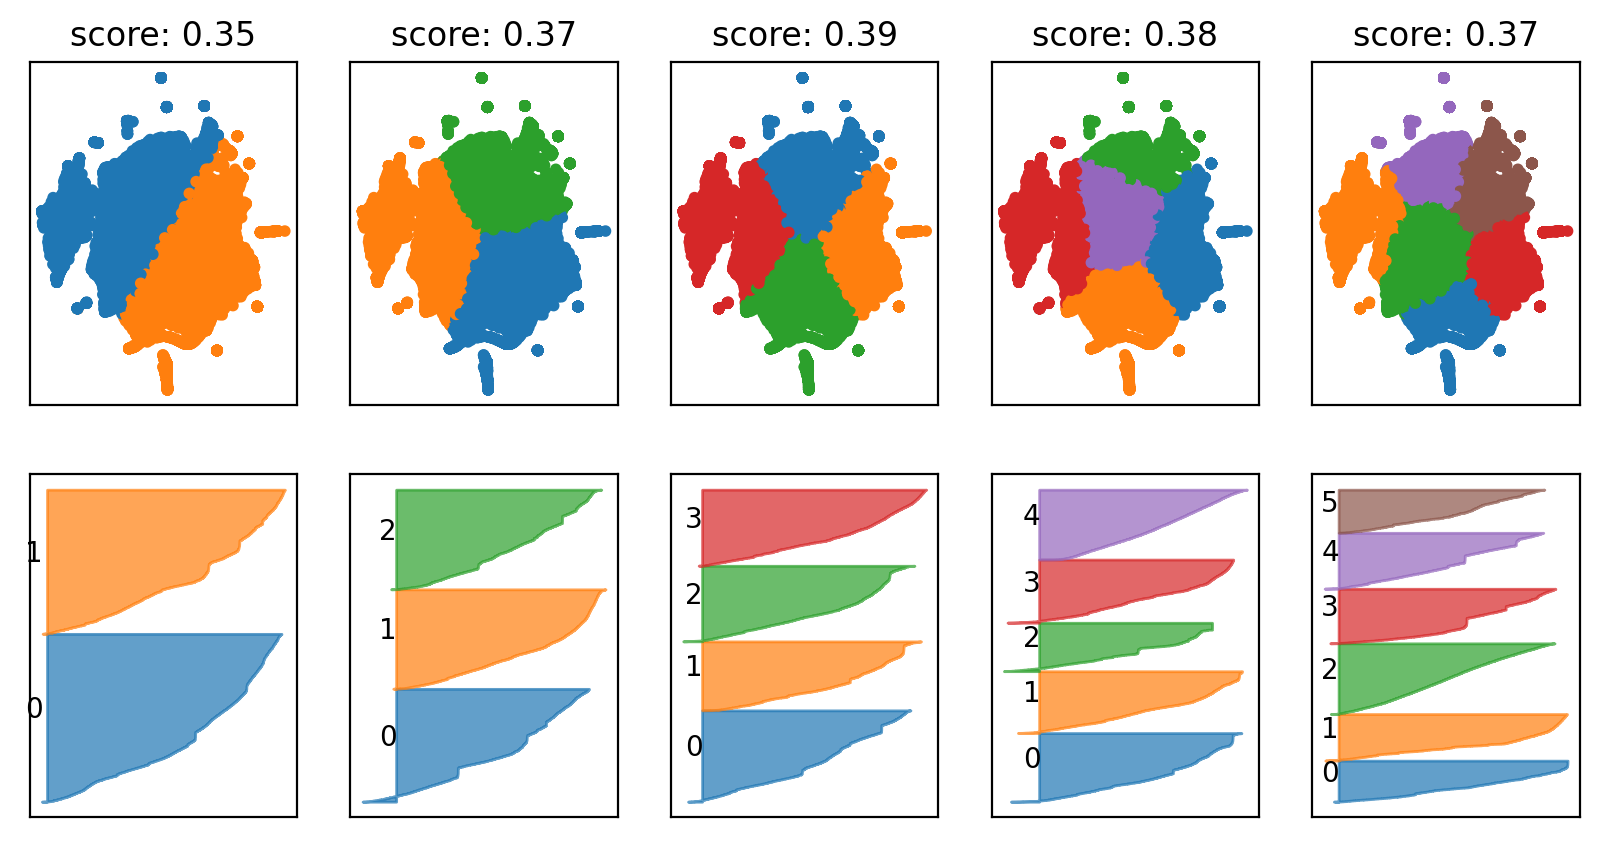

In [66]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 5))
for ax, n_clusters in zip(axes.T,[2,3,4,5,6,7,8,9,10]):
    kmt = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_t)
    ax[0].scatter(X_t[:, 0], X_t[:, 1], c=plt.cm.tab10(kmt), s=10)
    silhouette_plot(X_t, kmt, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X_t, kmt)))

Again this visualization shows the two distinct 2 clusters, but we can see that there is more under the two.
and the graphs below use different methods of Agglomerative Clustering for 4 clusters. The Complete method shows the most promising results and confirms.  

complete : [ 7489 13568  8514  4369]
average : [ 8683 10595 10396  4266]
ward : [12163 10294  7414  4069]


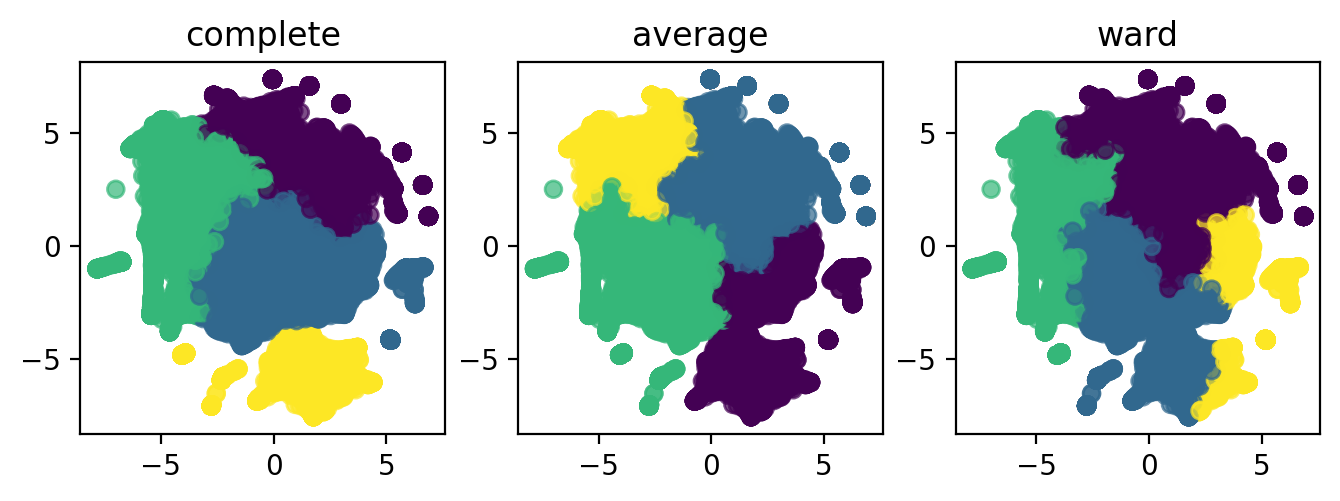

In [60]:
from sklearn.cluster import AgglomerativeClustering
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for ax, linkage in zip(axes, ["complete", "average", 'ward']):
    agg = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    agg.fit(X_t)
    ax.scatter(X_t[:, 0], X_t[:, 1], c=agg.labels_, alpha=.7)
    ax.set_title(linkage)
    ax.set_aspect("equal")
    print("{} : {}".format(linkage, np.bincount(agg.labels_)))

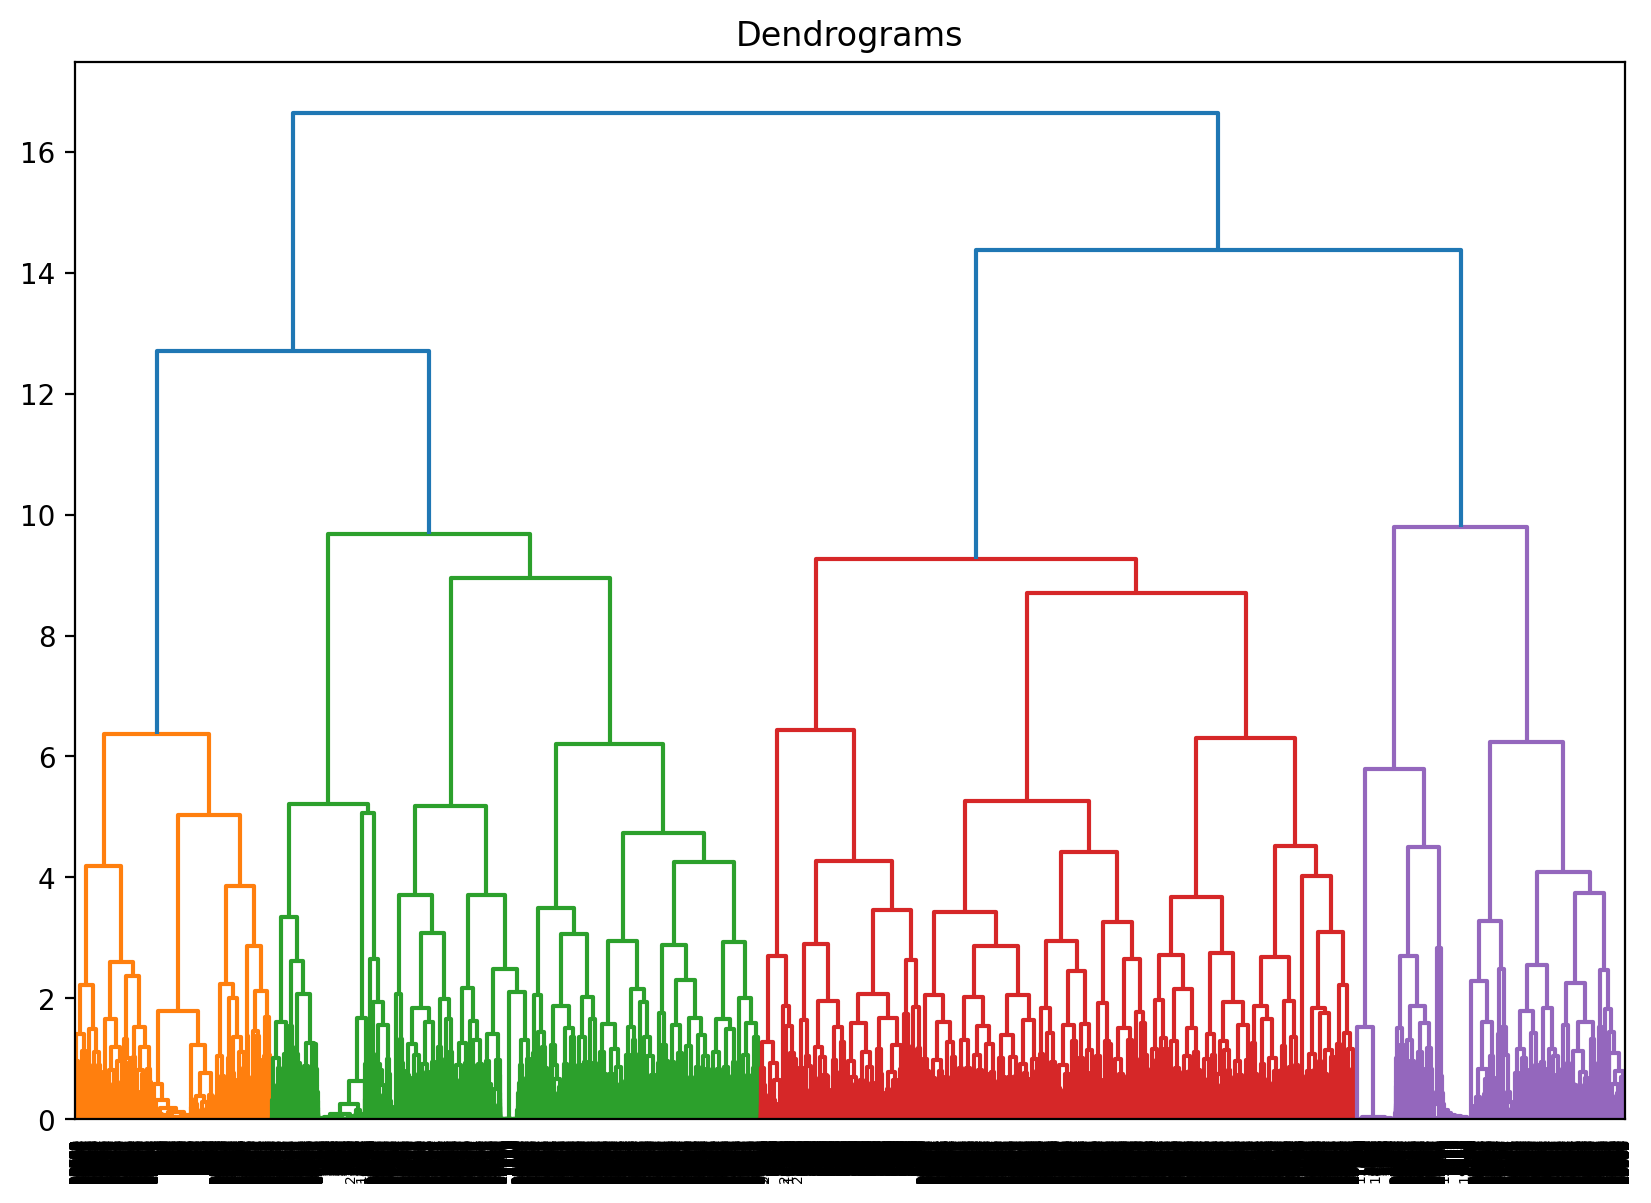

In [67]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_t, method='complete'))

Again this visualization shows the two distinct 2 clusters, but we can see that there is more under the two.
and the graphs below use different methods of Agglomerative Clustering for 4 clusters. The Complete method shows the most promising results and confirms. 